# Customer Segmentation
Market segmentation is crucial for businesses to thrive in today's competitive landscape. By dividing their customer base into groups with shared characteristics, such as age, income, or lifestyle preferences, companies can develop targeted marketing strategies. Imagine a sports apparel brand segmenting their market into young athletes and weekend joggers. They can create energetic ad campaigns featuring professional athletes for the younger group, while promoting comfortable and functional clothes for the joggers. This targeted approach allows businesses to speak directly to their ideal customer's needs and wants, leading to increased sales and brand loyalty.

Traditional customer segmentation relies on manually analyzing data points like demographics. Machine learning takes this a step further. By analyzing vast amounts of customer data, including purchase history, website behavior, and even social media interactions, machine learning algorithms can uncover hidden patterns and automatically group customers into segments with surprising accuracy. This goes beyond basic demographics to identify nuanced segments based on behavior and preferences. It's like having a superpowered magnifying glass that reveals customer groupings you might have otherwise missed.

In [ ]:
# Load necessary files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Description of the usecase

In this case study, a major bank wants to do targeted ad campaign and new product development by dividing the customers into at least 3 categories. The bank has extensive data collected and summarized. They want to perform a market segmentation analysis on this data.

# Load the data

In [ ]:
 # Mount the drive to Colab for accessing the data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/CUB/5010 - Unsupervised Methods/Marketing_data.csv'

### Data description
* CUSTID: Identification of Credit Card holder
* BALANCE: Balance amount left in customer's account to make purchases
* BALANCE_FREQUENCY: How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES: Amount of purchases made from account
* ONEOFFPURCHASES: Maximum purchase amount done in one-go
* INSTALLMENTS_PURCHASES: Amount of purchase done in installment
* CASH_ADVANCE: Cash in advance given by the user
* PURCHASES_FREQUENCY: How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFF_PURCHASES_FREQUENCY: How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASES_INSTALLMENTS_FREQUENCY: How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASH_ADVANCE_FREQUENCY: How frequently the cash in advance being paid
* CASH_ADVANCE_TRX: Number of Transactions made with "Cash in Advance"
* PURCHASES_TRX: Number of purchase transactions made
* CREDIT_LIMIT: Limit of Credit Card for user
* PAYMENTS: Amount of Payment done by user
* MINIMUM_PAYMENTS: Minimum amount of payments made by user  
* PRC_FULL_PAYMENT: Percent of full payment paid by user
* TENURE: Tenure of credit card service for user

In [ ]:
creditcard_df = pd.read_csv(FILE_PATH)

In [ ]:
creditcard_df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


# Exploratory data analysis


In [ ]:
# What is the total number of records?
n = len(creditcard_df)
n

8950

In [ ]:
creditcard_df.info()
# 18 features with 8950 points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
creditcard_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Some key observations :
* Mean balance is $1564

* Balance frequency is frequently updated on average ~0.9

* Purchases average is $1000

* One off purchase average is ~$600

* Average purchases frequency is around 0.5

* average ONEOFF_PURCHASES_FREQUENCY, PURCHASES_INSTALLMENTS_FREQUENCY, and CASH_ADVANCE_FREQUENCY are generally low

* Average credit limit ~ 4500

* Percent of full payment is 15%

* Average tenure is 11 years

In [ ]:
# Let's see who made one off purchase of $40761!
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [ ]:
# What is the maximum cash advance made in a credit card?
creditcard_df['CASH_ADVANCE'].max()

47137.21176

In [ ]:
creditcard_df[creditcard_df['CASH_ADVANCE'] > 47137]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


This customer made 123 cash advance transactions!!

Never paid credit card in full!

In [ ]:
# Let's see if we have any missing data
creditcard_df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

The data is of good quality, with few missing data in Minimum Payments. there is only one missing data in Credit Limit. Next, we visualize the missing data in the entire dataset.

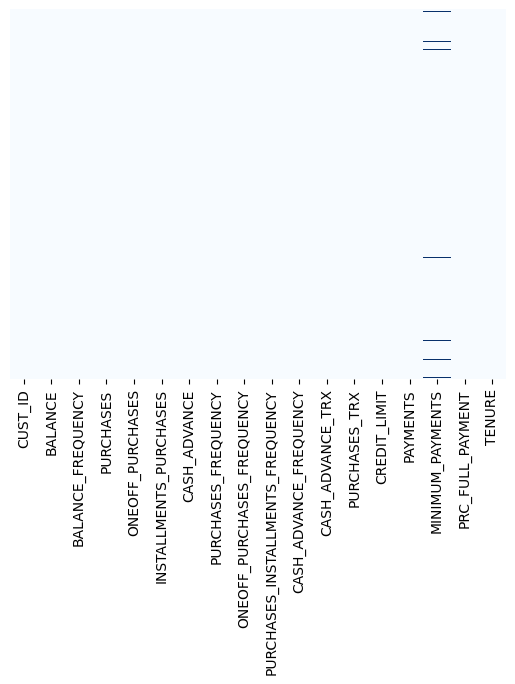

In [ ]:

sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues");

We will do a few imputations for removing missing data from the two identified features.We will use mean imputation for both these features. Here kmeans could also have been used for a more appropriate imputation

In [ ]:
# Fill up the missing elements with mean of the 'MINIMUM_PAYMENT'
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()
# Fill up the missing elements with mean of the 'CREDIT_LIMIT'
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()

<Axes: >

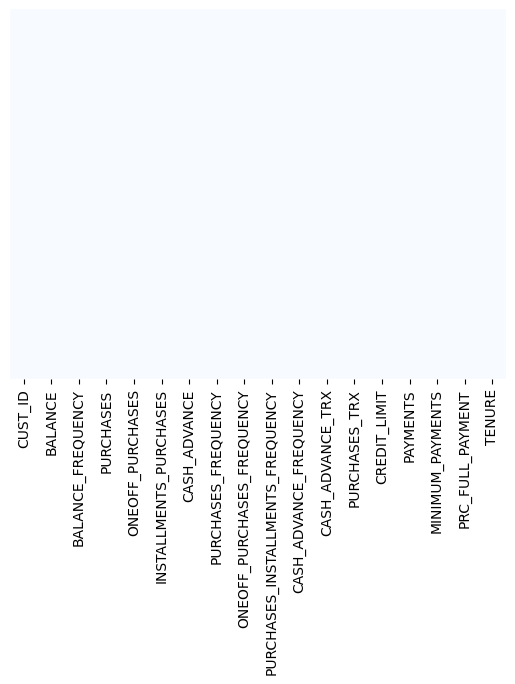

In [ ]:
sns.heatmap(creditcard_df.isnull(), yticklabels = False, cbar = False, cmap="Blues");
# now the data is pristine clean!

Now, let us check for duplicate records

In [ ]:
# Let's see if we have duplicated entries in the data
creditcard_df.duplicated().sum()
# None!

0

In [ ]:
# Let's drop Customer ID since it will not be used as any feature here
creditcard_df.drop("CUST_ID", axis = 1, inplace= True)

In [ ]:
creditcard_df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

<ipython-input-28-8fad5db54316>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
<ipython-input-28-8fad5db54316>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[cre

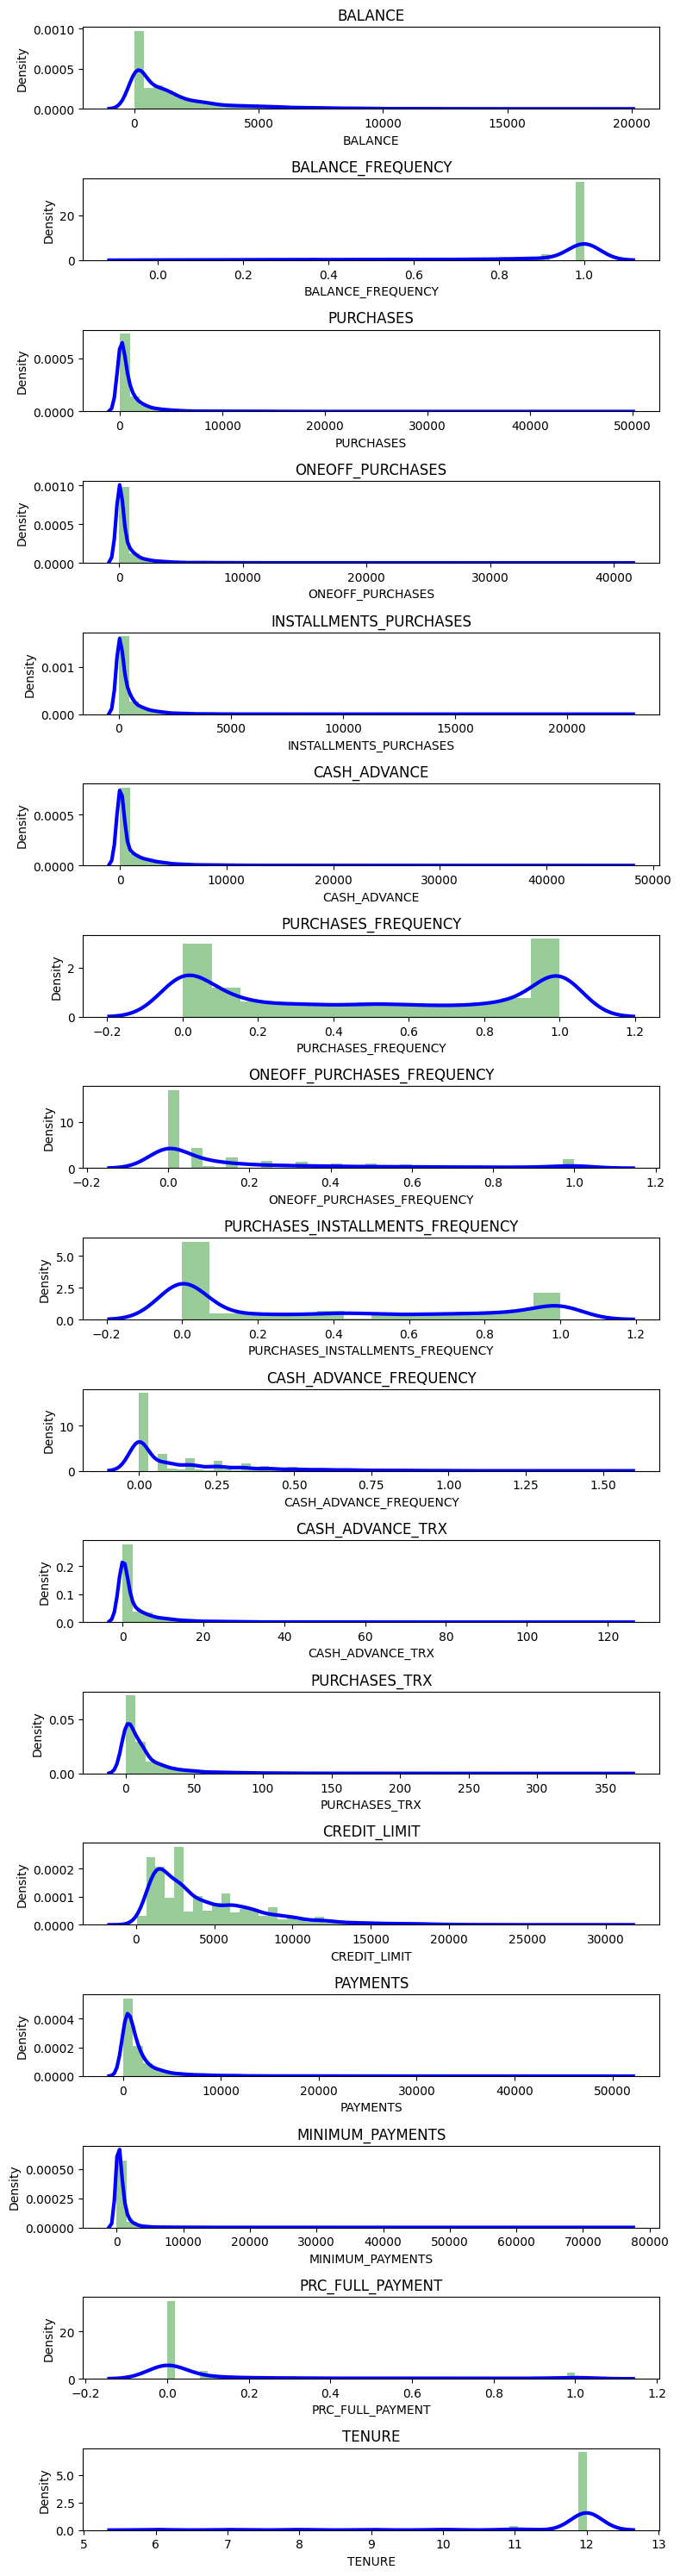

In [ ]:
# Now for some more insights from the data
# distplot combines the matplotlib.hist function with seaborn kdeplot()
# KDE Plot represents the Kernel Density Estimate
# KDE is used for visualizing the Probability Density of a continuous variable.
# KDE demonstrates the probability density at different values in a continuous variable.
# It is used to fill the area under the Gaussian curve
plt.figure(figsize=(8,30))
for i in range(len(creditcard_df.columns)):
  plt.subplot(17, 1, i+1)
  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde_kws={"color": "b", "lw": 3, "label": "KDE"}, hist_kws={"color": "g"})
  plt.title(creditcard_df.columns[i])

plt.tight_layout()

### Some key observations on the data based on the graph above:
* Mean of balance is $1500

* 'Balance_Frequency' for most customers is updated frequently ~1

* For 'PURCHASES_FREQUENCY', there are two distinct group of customers

* For 'ONEOFF_PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY' most users don't do one off puchases or installment purchases frequently

* Very small number of customers pay their balance in full 'PRC_FULL_PAYMENT'~0

* Credit limit average is around $4500

* Most customers are ~11 years tenure


In [ ]:
# Caution !! Long running code!
sns.pairplot(creditcard_df)

Output hidden; open in https://colab.research.google.com to view.

<Axes: >

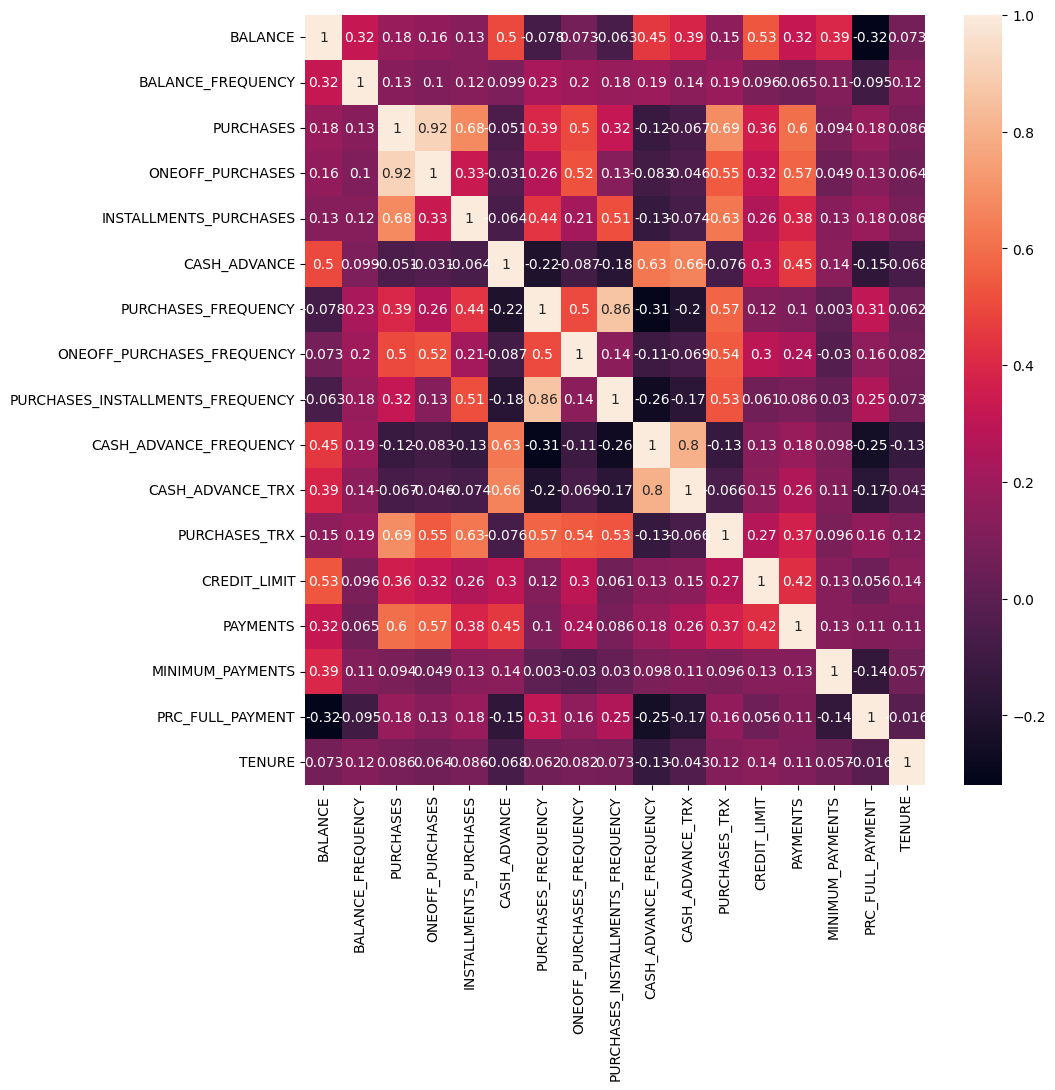

In [ ]:
correlations = creditcard_df.corr()
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlations, annot = True)

### Some key observations here:
* Correlation between 'PURCHASES' and ONEOFF_PURCHASES & INSTALMENT_PURCHASES

* Trend between 'PURCHASES' and 'CREDIT_LIMIT' & 'PAYMENTS'

* 'PURCHASES' have high correlation between one-off purchases, 'installment purchases, purchase transactions, credit limit and payments.

* Strong Positive Correlation between 'PURCHASES_FREQUENCY' and 'PURCHASES_INSTALLMENT_FREQUENCY'

# Description of the K-means Algorithm
## K-Means Clustering: Unsupervised Learning for Market Segmentation

K-means clustering is a popular unsupervised machine learning algorithm for grouping data points into a predefined number of clusters (k). It iteratively refines these clusters to minimize the within-cluster variance, making them more cohesive. Here's a breakdown:

**The Process:**

1. **Define k:** You specify the desired number of customer segments (k).
2. **Initialize centroids:** The algorithm randomly selects k data points as initial cluster centers (centroids).
3. **Assign points:** Each data point is assigned to the closest centroid based on distance (usually Euclidean).
4. **Recompute centroids:** The centroids are recalculated as the mean of the points assigned to each cluster.
5. **Repeat:** Steps 3 and 4 are repeated until the centroids no longer change significantly (convergence).

**Hyperparameters:**

* **k:** The most crucial parameter, defining the number of clusters. Choosing the optimal k can be challenging and often involves domain knowledge and evaluation metrics.
* **Initialization method:** K-means is sensitive to initial centroid placement. You can choose random initialization or more sophisticated methods like "k-means++" for faster convergence.
* **Distance metric:** Euclidean distance is commonly used, but other metrics like Manhattan distance might be suitable depending on your data.
* **Max iterations:** Defines the maximum number of times the algorithm repeats steps 3 and 4.

**Maths Behind the Scenes:**

* **Distance calculation:** Euclidean distance is used to measure the distance between data points and centroids.
* **Centroid update:** The centroid for each cluster is simply the mean of the data points assigned to that cluster.

**Benefits for Market Segmentation:**

* **Automated customer grouping:** K-means helps uncover hidden segments based on purchase history, demographics, and behavior.
* **Targeted marketing:** By understanding customer segments, businesses can tailor marketing campaigns and product offerings for maximum impact.

**References:**

* [https://realpython.com/podcasts/rpp/21/](https://realpython.com/podcasts/rpp/21/)
* [https://www.analyticsvidhya.com/blog/2021/11/understanding-k-means-clustering-in-machine-learningwith-examples/](https://www.analyticsvidhya.com/blog/2021/11/understanding-k-means-clustering-in-machine-learningwith-examples/)


### Finding the optimal number of clusters using the elbow method
- The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset.
- If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

In [ ]:
# Let's scale the data first
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)

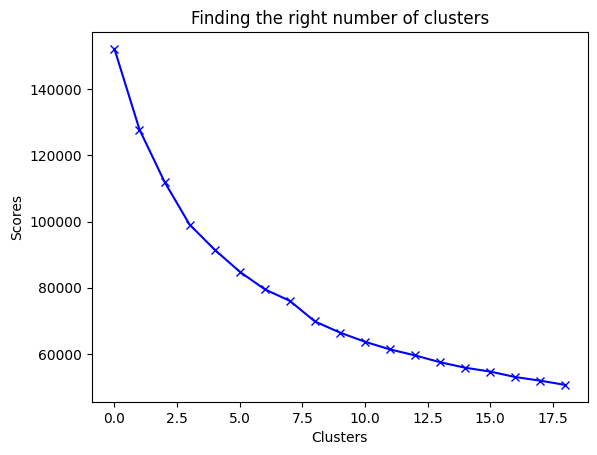

In [ ]:
scores_1 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters = i,n_init=10)
  kmeans.fit(creditcard_df_scaled)
  scores_1.append(kmeans.inertia_)

plt.plot(scores_1, 'bx-')
plt.title('Finding the right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('Scores')
plt.show()

* From this we can observe that, 4th cluster seems to be forming the elbow of the curve.

* However, the values does not reduce linearly until 8th cluster.

* Let's choose the number of clusters to be 8.

### Applying the K-means method

In [ ]:
kmeans = KMeans(8,n_init=10)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [ ]:
kmeans.cluster_centers_.shape
# 8 Clusters identified with 17 features

(8, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.335461,-0.339570,-0.281588,-0.205800,-0.287359,0.065464,-0.190186,-0.266850,-0.226118,0.303538,-0.002557,-0.381841,-0.556565,-0.388868,-0.209164,0.014443,-3.190788
1,-0.380927,0.334323,-0.032887,-0.200479,0.290388,-0.371838,0.974094,-0.184894,1.076196,-0.480673,-0.364859,0.174746,-0.259802,-0.222042,-0.119094,0.313556,0.257262
2,1.622211,0.393174,-0.218194,-0.154217,-0.232662,1.984686,-0.468336,-0.189015,-0.421104,1.920743,1.913668,-0.257947,0.995373,0.805494,0.363540,-0.390196,0.075701
3,-0.701770,-2.130740,-0.304916,-0.227255,-0.303348,-0.323026,-0.543709,-0.418862,-0.444195,-0.521448,-0.376209,-0.413807,-0.170065,-0.200729,-0.257552,0.299346,0.200333
4,0.001651,0.402178,-0.338836,-0.217217,-0.401993,-0.113954,-0.798303,-0.311126,-0.760304,0.070578,-0.051053,-0.460844,-0.303906,-0.247941,-0.063980,-0.452522,0.272988
5,0.267489,0.443903,1.275411,1.157790,0.888520,-0.282026,1.124033,1.880111,0.690393,-0.377879,-0.291650,1.529954,0.892886,0.628676,-0.004510,0.503102,0.308359
6,1.876277,0.343535,11.043146,10.334427,7.122203,0.391031,1.054172,1.885885,1.001265,-0.272345,0.043896,5.278083,3.034577,8.005903,1.078468,1.084940,0.312470
7,1.198066,0.470114,0.011315,-0.285606,0.550623,-0.026758,-0.047416,-0.547152,0.193031,-0.147366,-0.033845,0.157512,-0.062278,-0.037378,9.395504,-0.520463,0.293962


In [ ]:
# In order to understand what these numbers mean, let's perform inverse transformation
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,866.240852,0.796830,401.588114,250.850887,151.212662,1116.152841,0.414020,0.122851,0.274572,0.195885,3.231379,5.218700,2469.436528,607.408142,376.758007,0.157939,7.247227
1,771.607597,0.956469,932.941027,259.682931,673.662112,199.110103,0.881302,0.147300,0.792145,0.038957,0.758933,19.053370,3549.184747,1090.355299,586.663636,0.245424,11.861601
2,4940.970441,0.970410,537.029678,336.468404,200.673991,5140.849655,0.302385,0.146071,0.197080,0.519504,16.308204,8.298226,8116.024995,4064.970277,1711.421233,0.039589,11.618625
3,103.799633,0.372518,351.746345,215.241115,136.754015,301.470911,0.272134,0.077503,0.187903,0.030797,0.681475,4.424141,3875.682686,1152.052715,263.992279,0.241268,11.785415
4,1567.912145,0.972543,279.276437,231.902169,47.550256,739.904617,0.169953,0.109643,0.062273,0.149268,2.900427,3.254979,3388.715031,1015.377841,715.104469,0.021360,11.882646
5,2121.230177,0.982427,3728.139192,2514.132101,1214.545691,387.449578,0.941479,0.763331,0.638817,0.059527,1.258528,52.738779,7743.132855,3553.099916,853.695923,0.300863,11.929982
6,5469.786878,0.958651,24597.057419,17745.470323,6851.587097,1798.881876,0.913441,0.765054,0.762366,0.080645,3.548387,145.903226,15535.483871,24909.448552,3377.529692,0.471041,11.935484
7,4058.147688,0.988636,1027.378750,118.389464,908.989286,922.757849,0.471320,0.039232,0.441153,0.105655,3.017857,18.625000,4267.857143,1624.939145,22760.031552,0.001488,11.910714


### Key insights from K-means clustering
* First Customers cluster (Transactors): Those are customers who pay least amount of intrerest charges and are careful with their money. this is the cluster with lowest balance 104 and cash advance 303, Percentage of full payment = 23%
* Second customers cluster (revolvers) who use credit card as a loan (most lucrative sector): highest balance 5000 and cash advance ~5000, low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
* Third customer cluster (VIP/Prime): high credit limit $16K and highest percentage of full payment, target for increase credit limit and increase spending habits
* Fourth customer cluster (low tenure): these are customers with low tenure (7 years), low balance

In [ ]:
labels.shape # Labels associated to each data point

(8950,)

In [ ]:
labels.max(),labels.min()

(7, 0)

In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

array([0, 5, 1, ..., 3, 3, 3], dtype=int32)

In [ ]:
# concatenate the clusters labels to our original dataframe
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,5
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,4


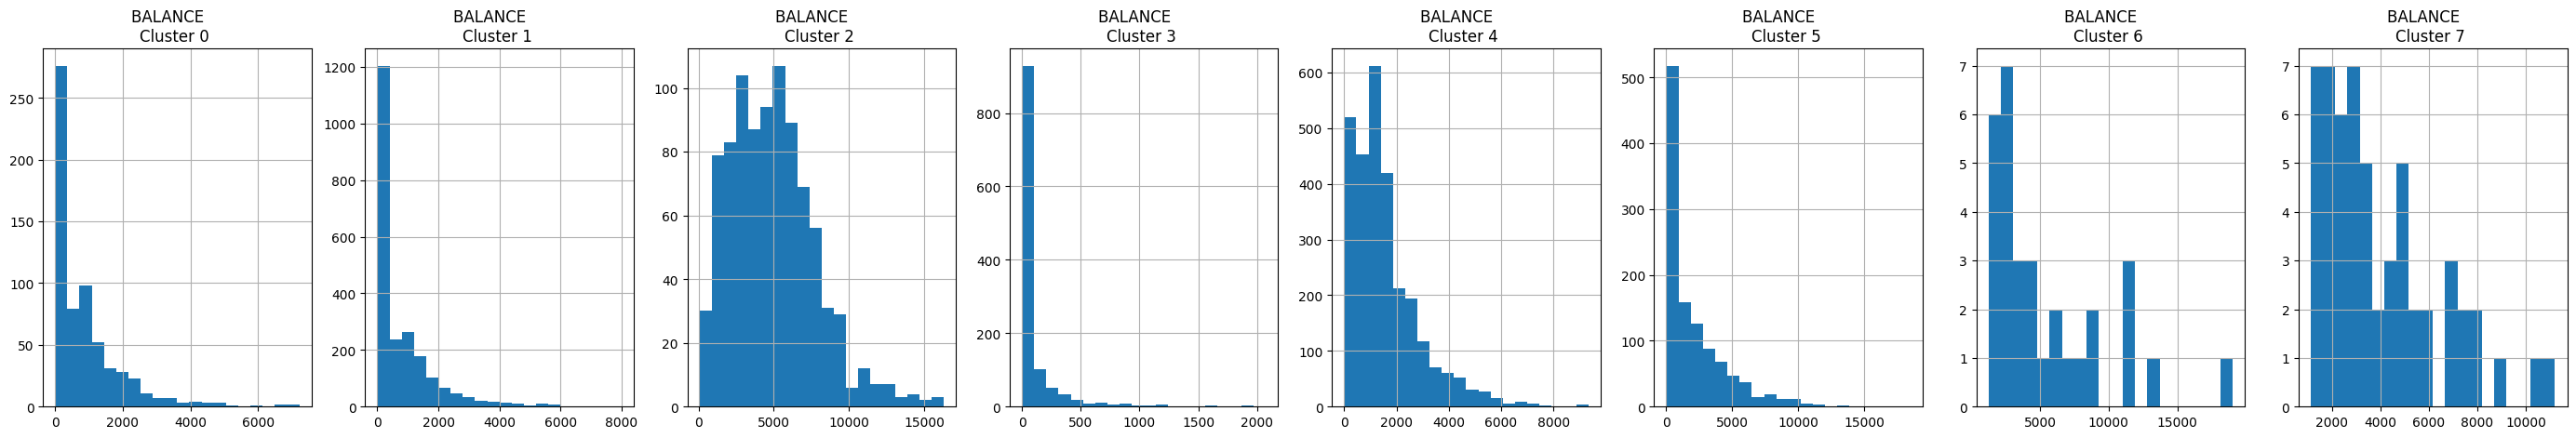

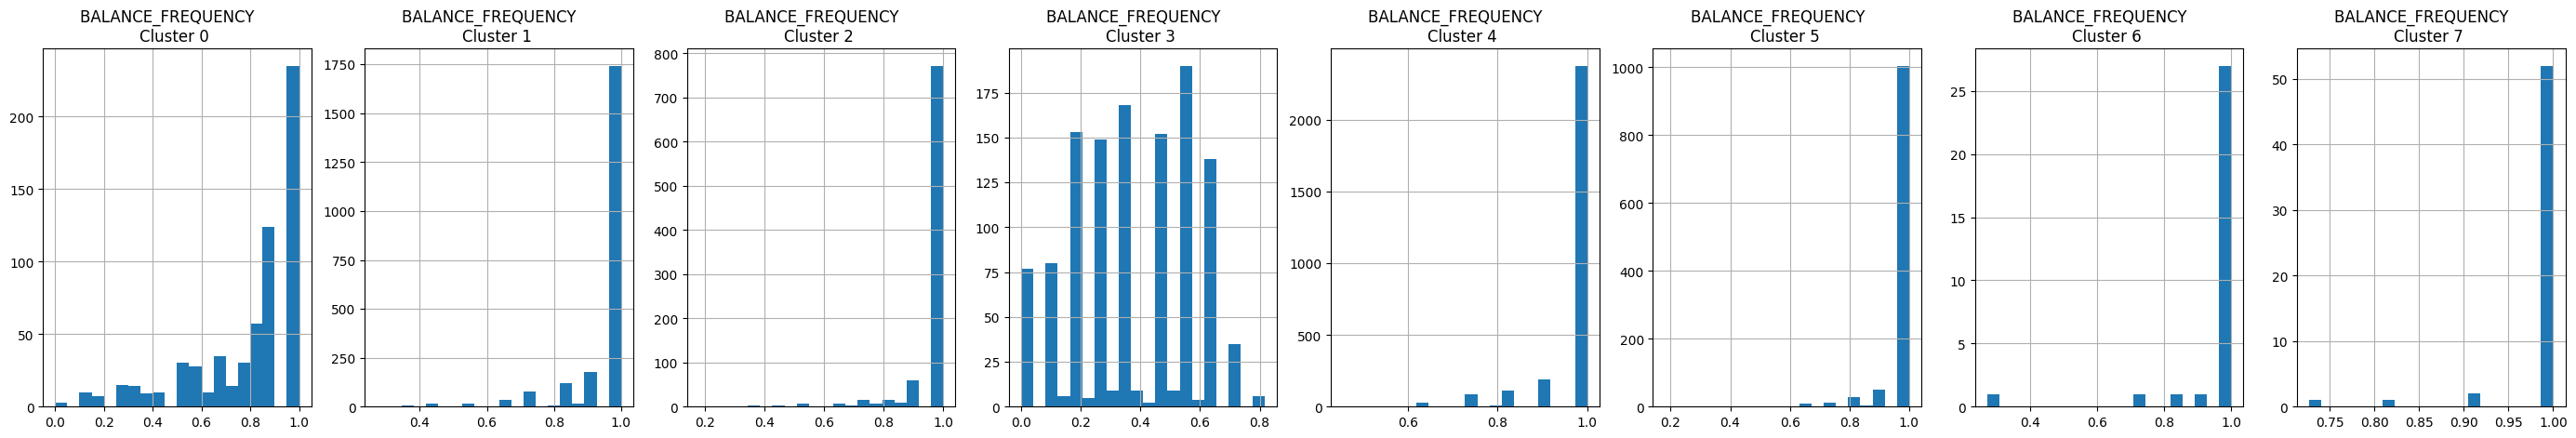

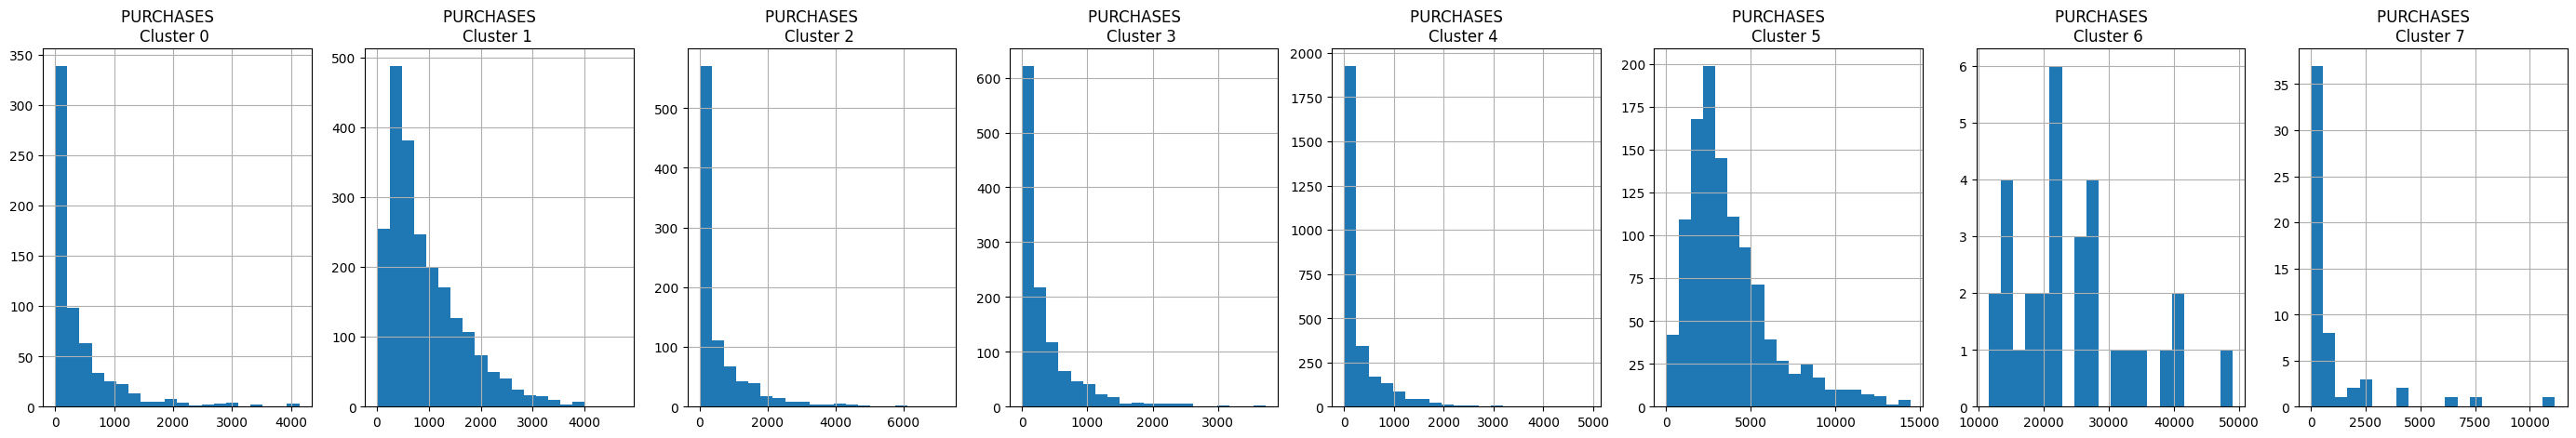

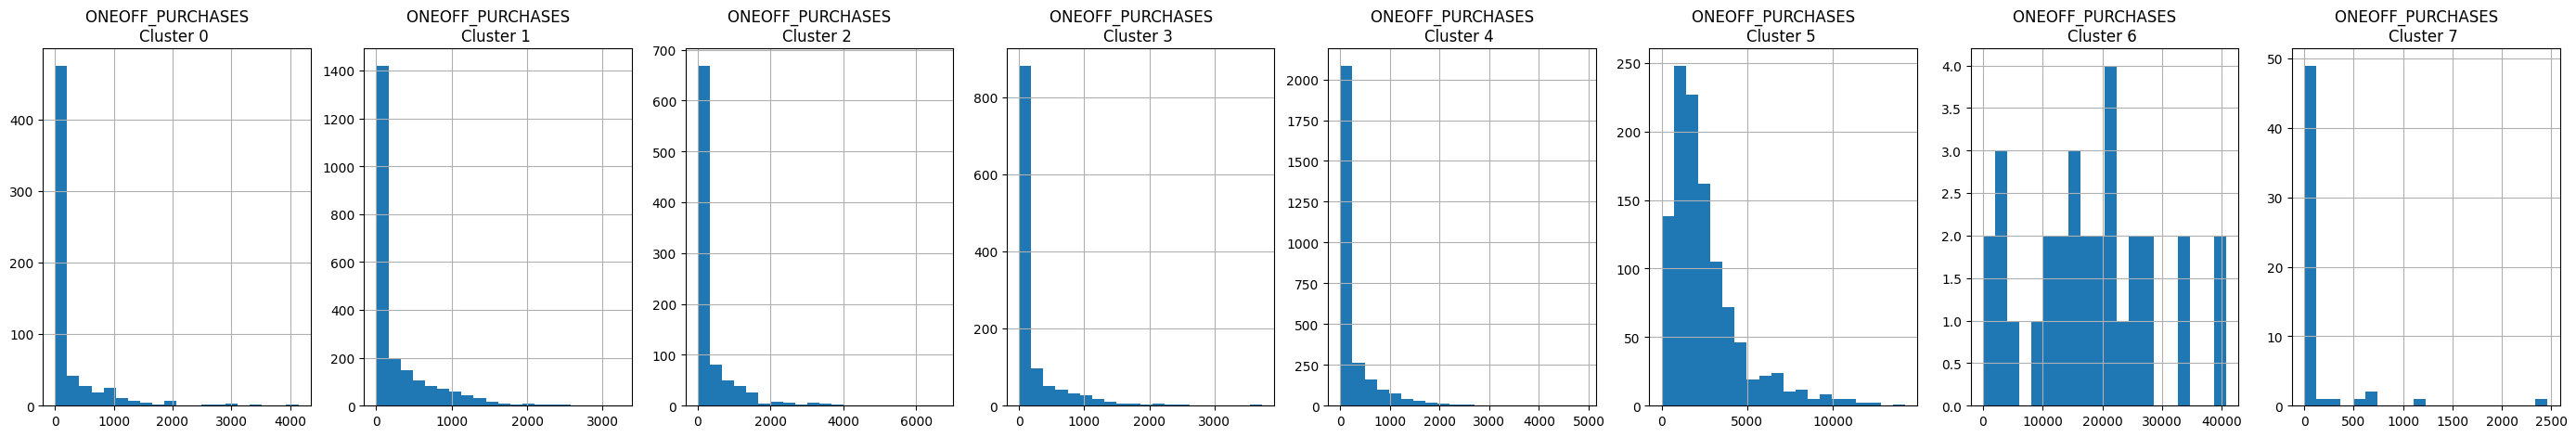

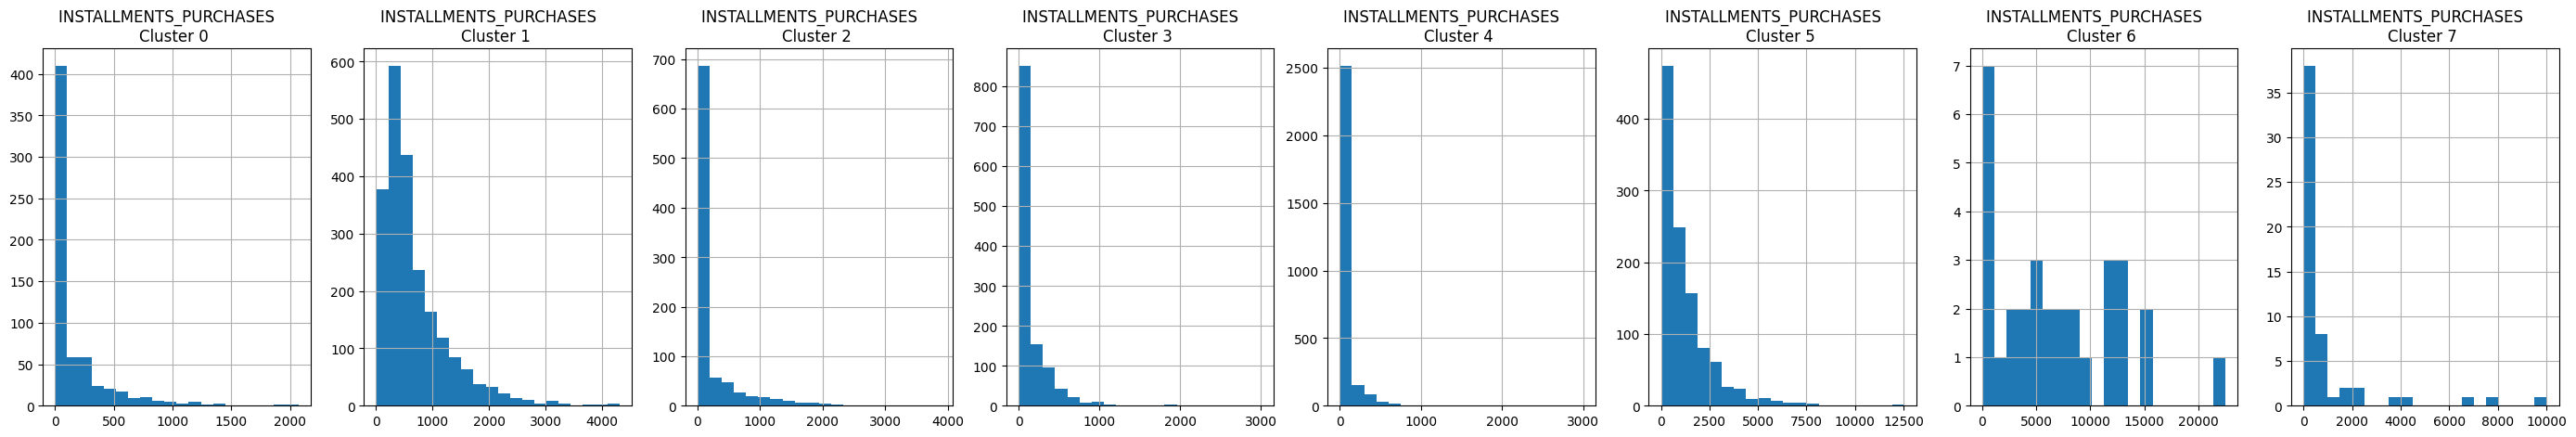

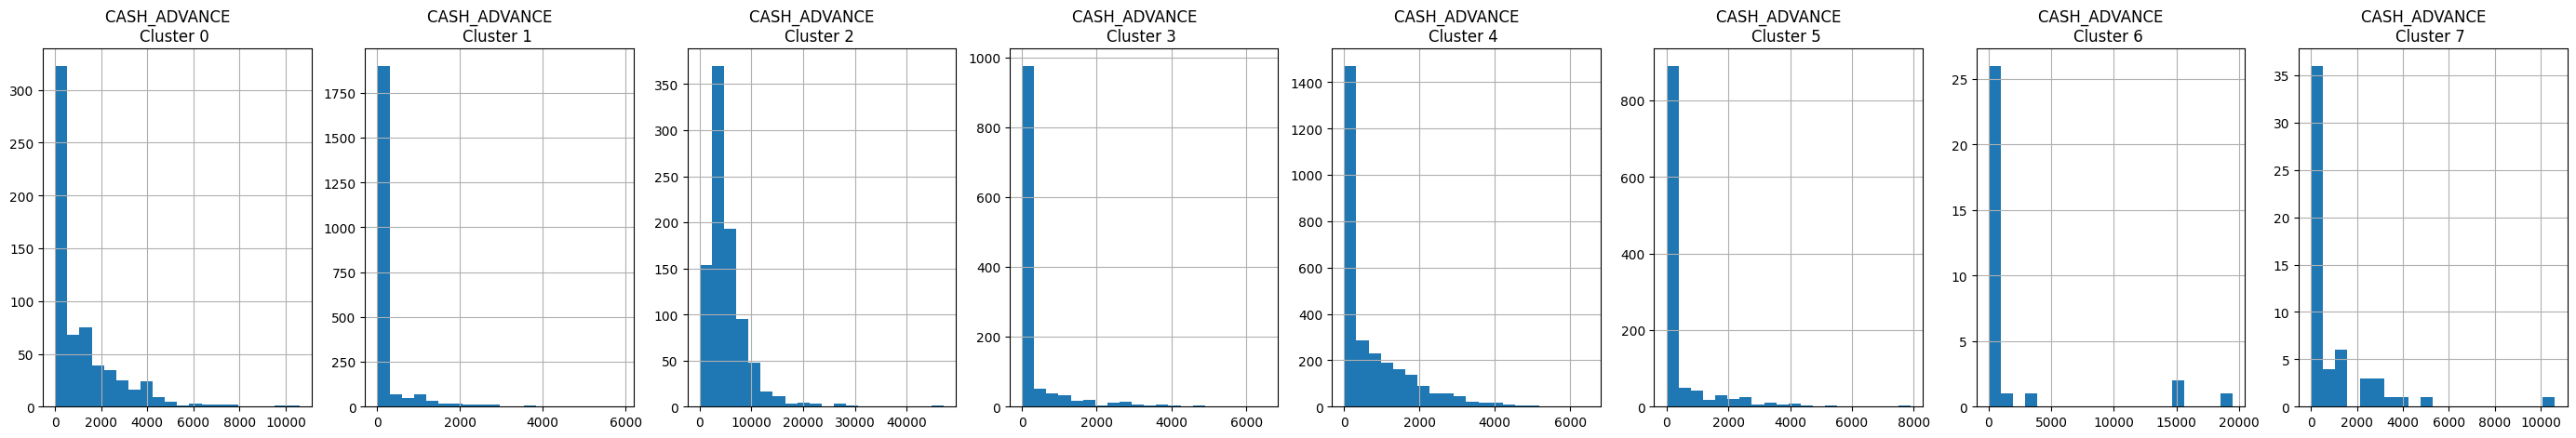

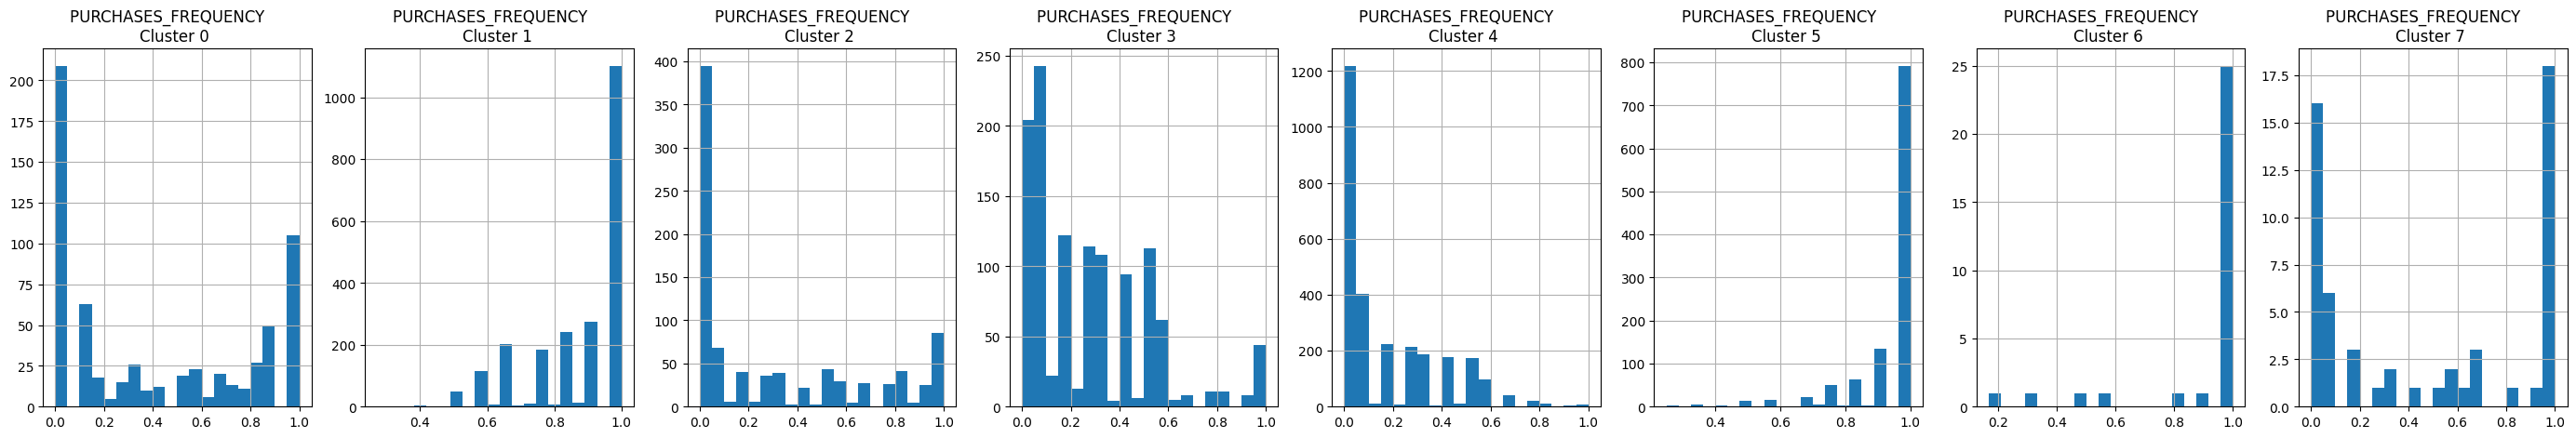

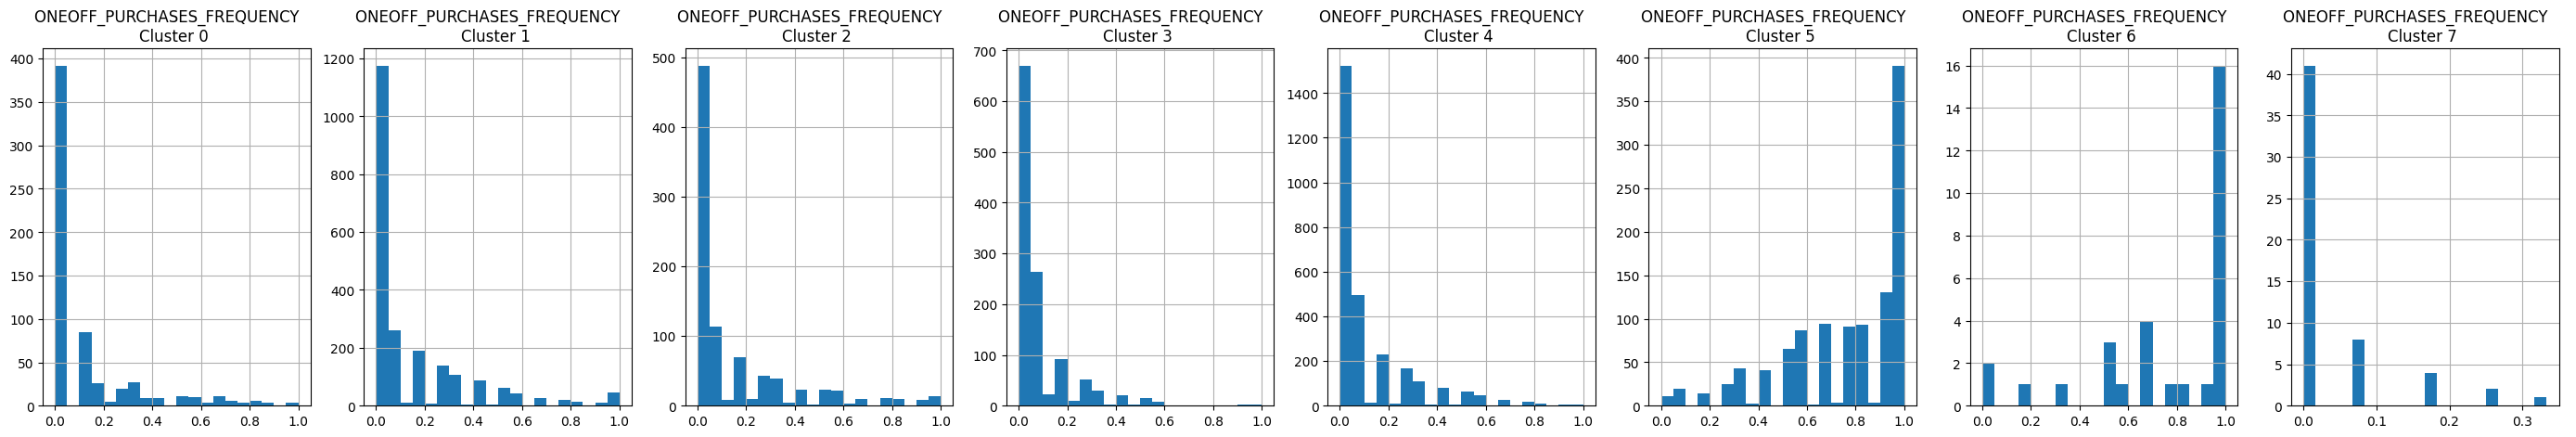

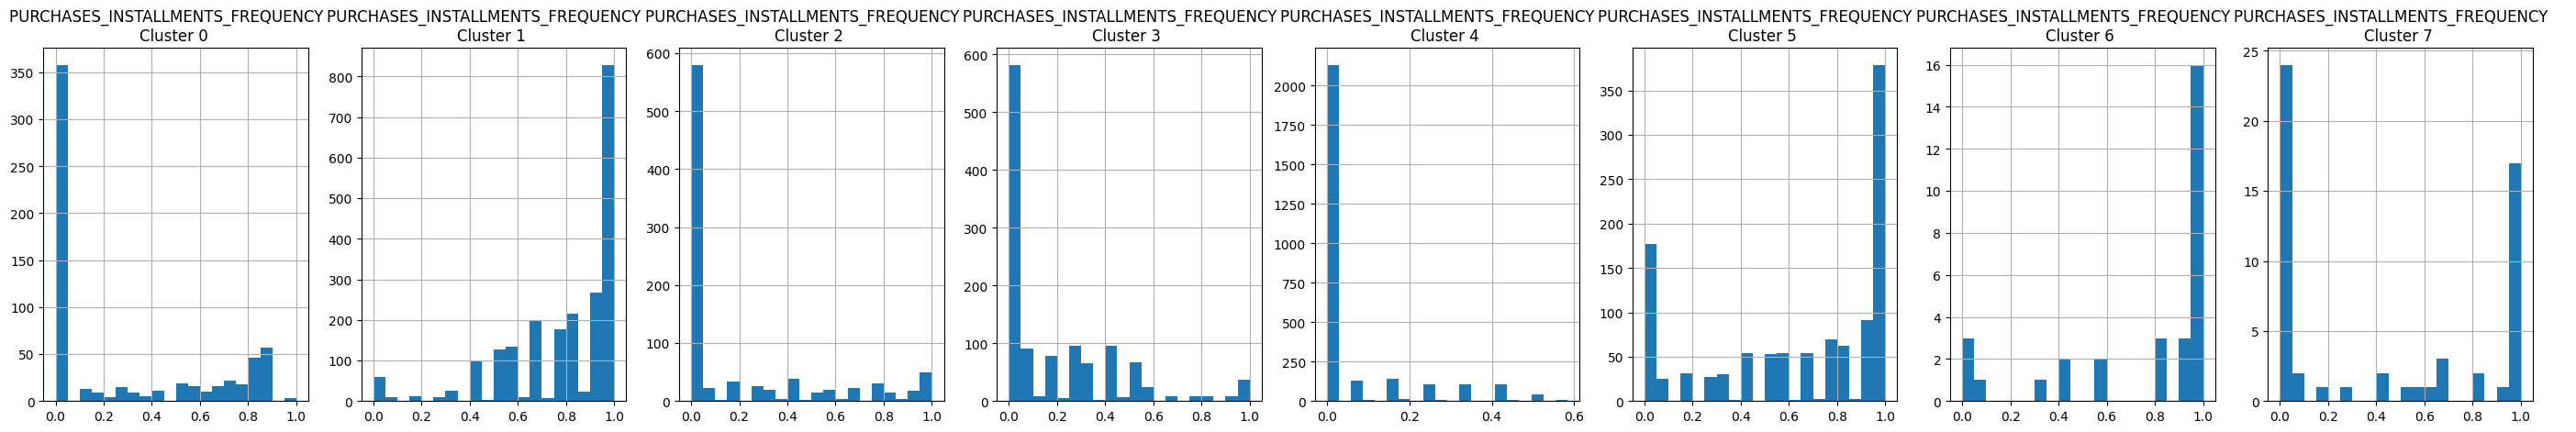

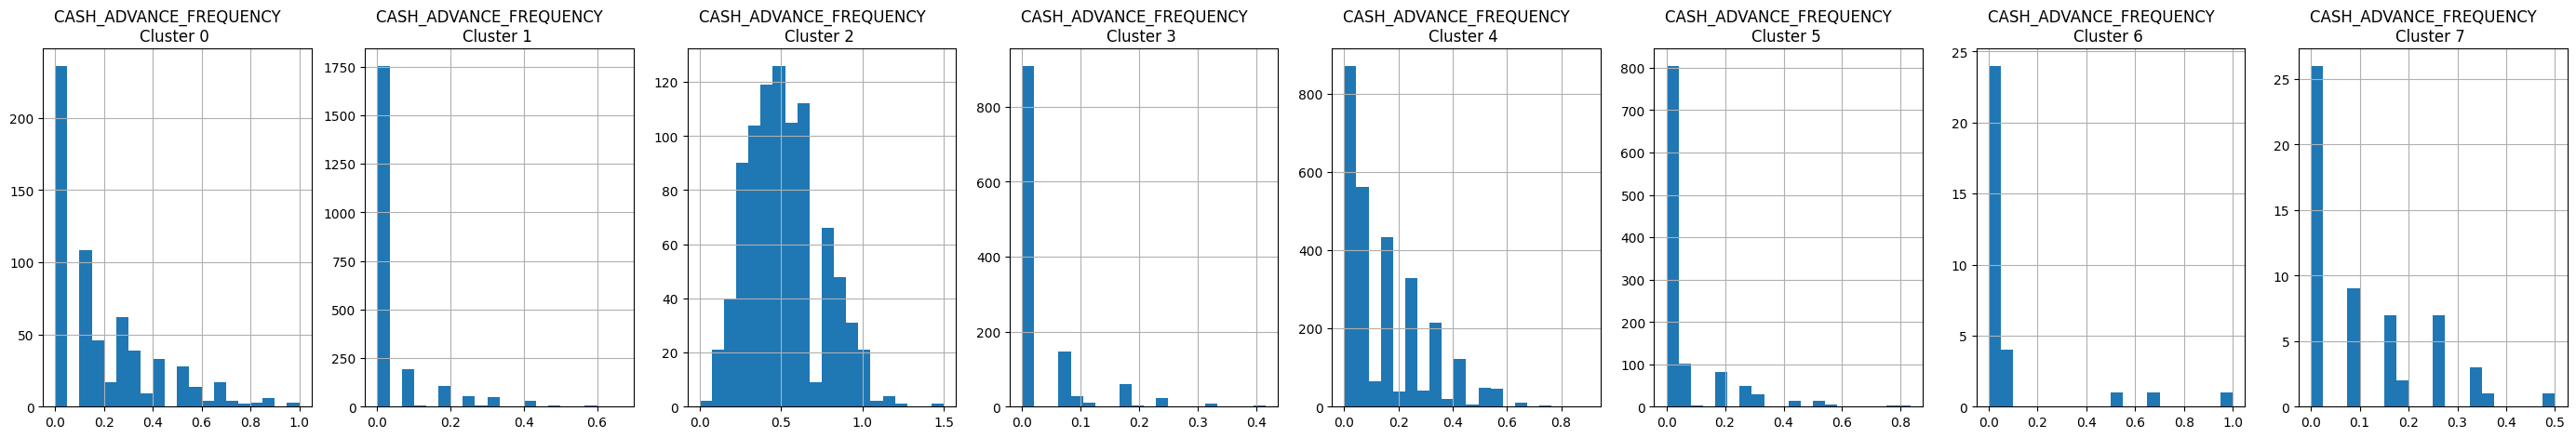

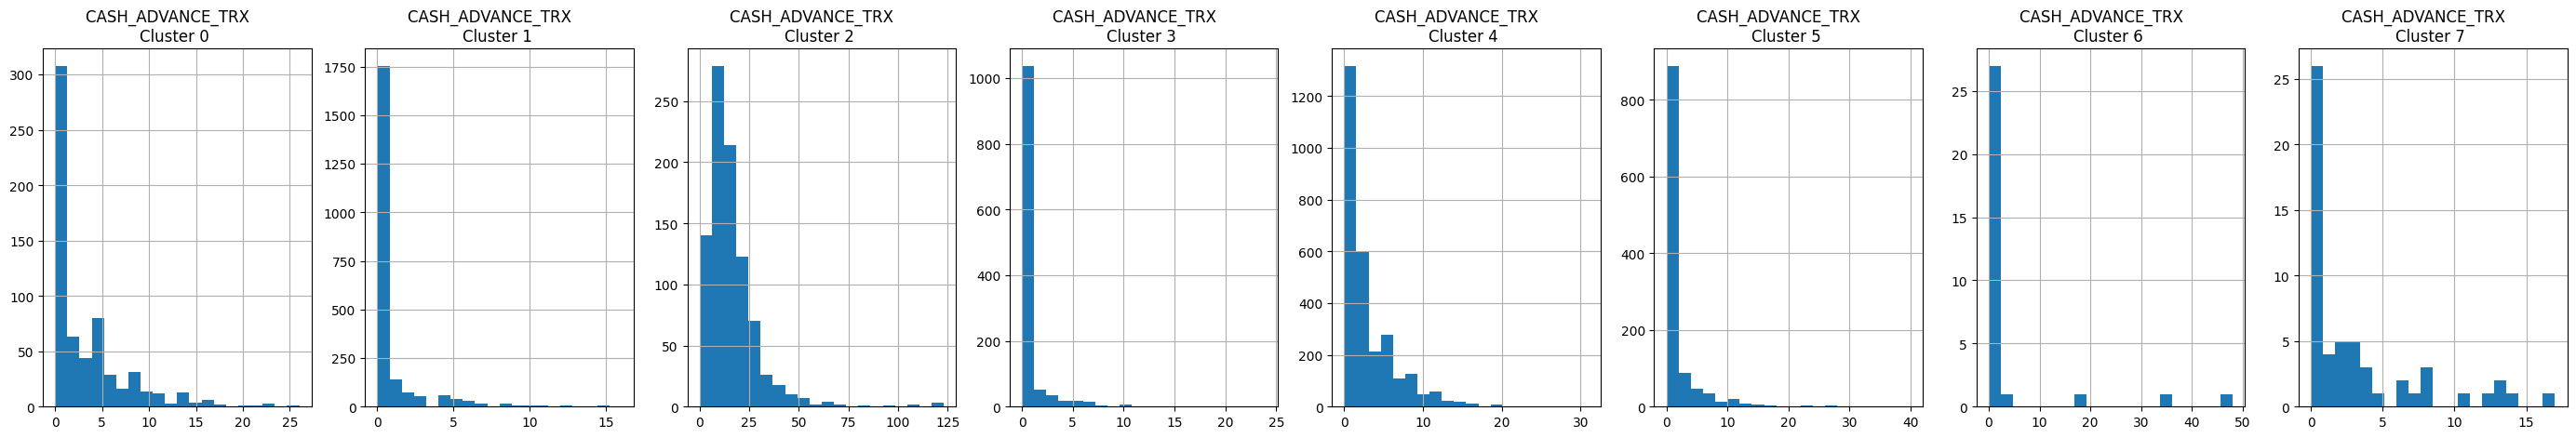

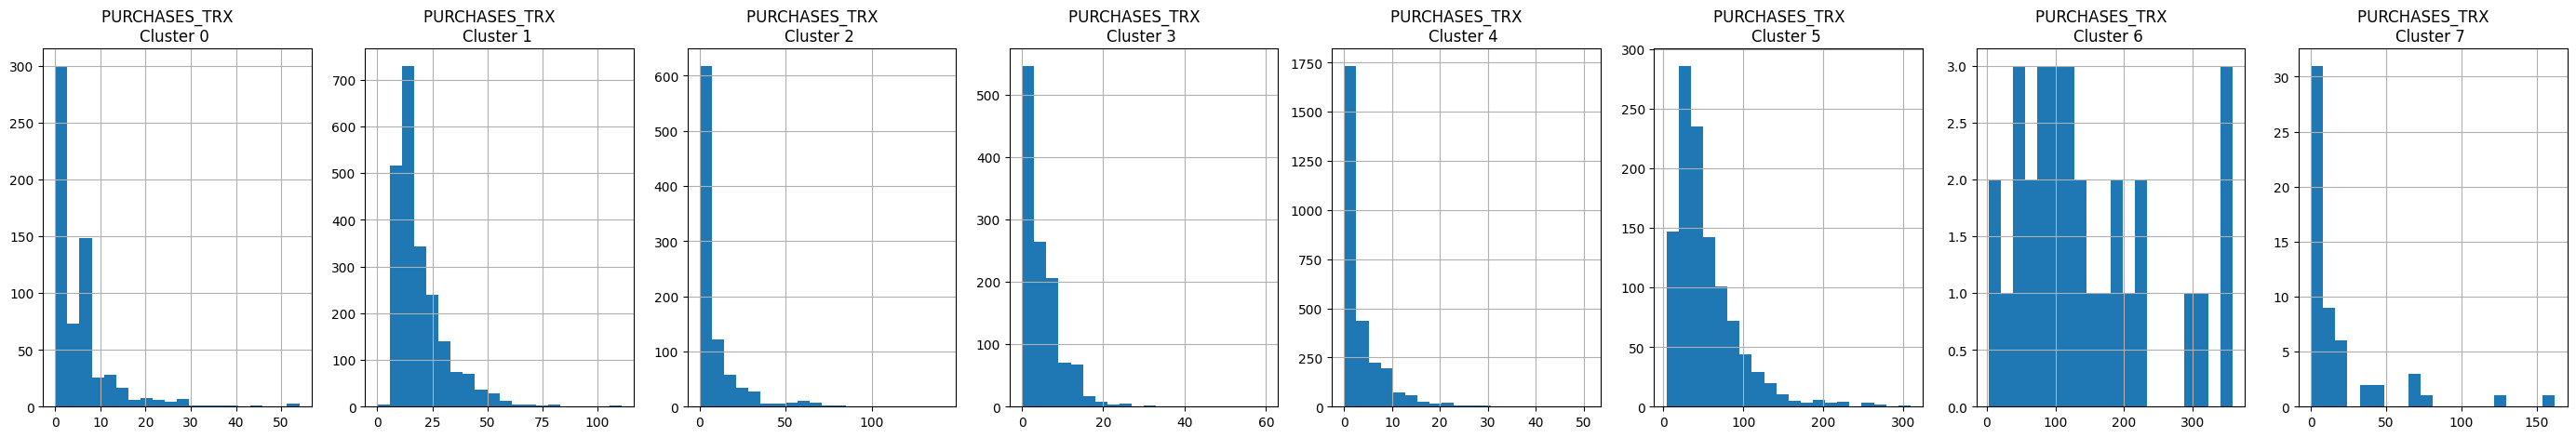

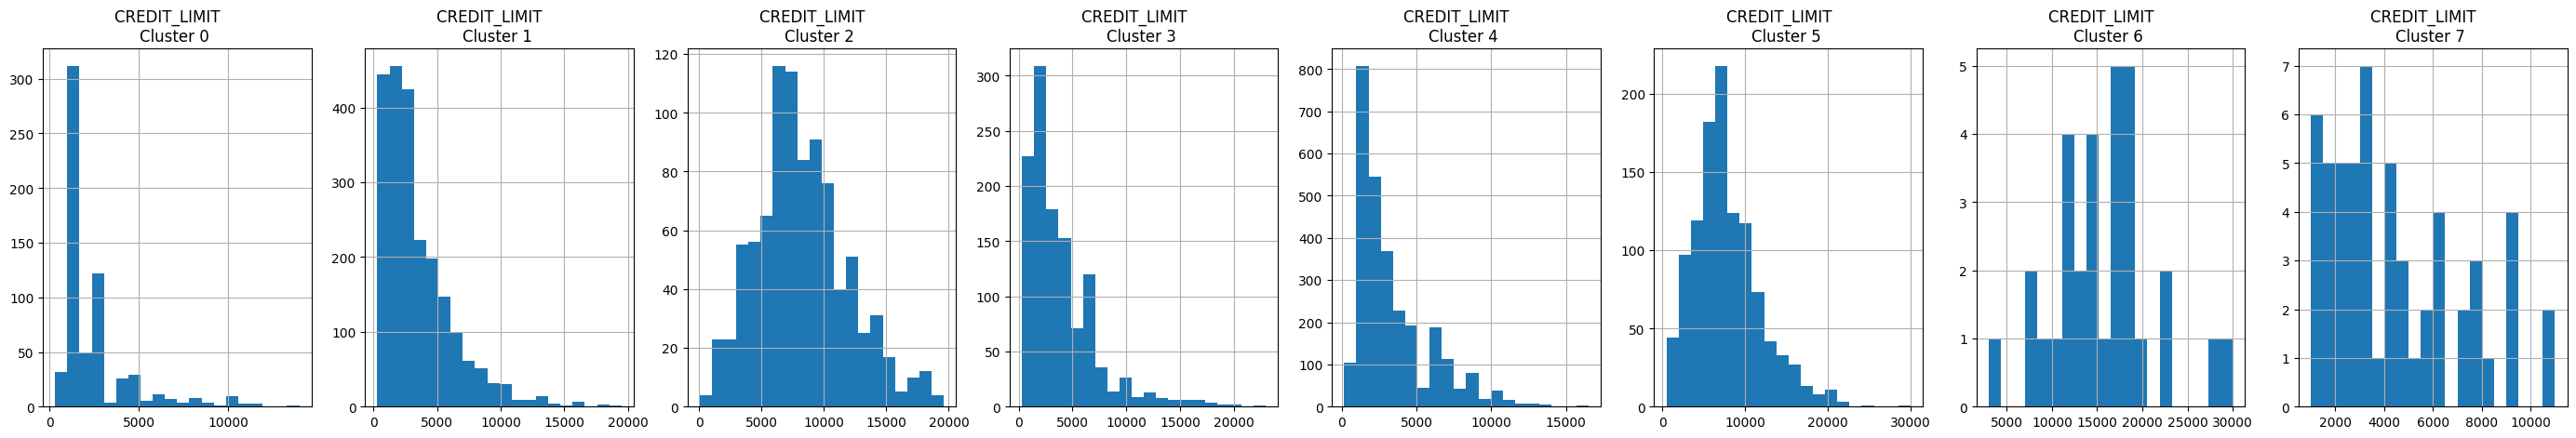

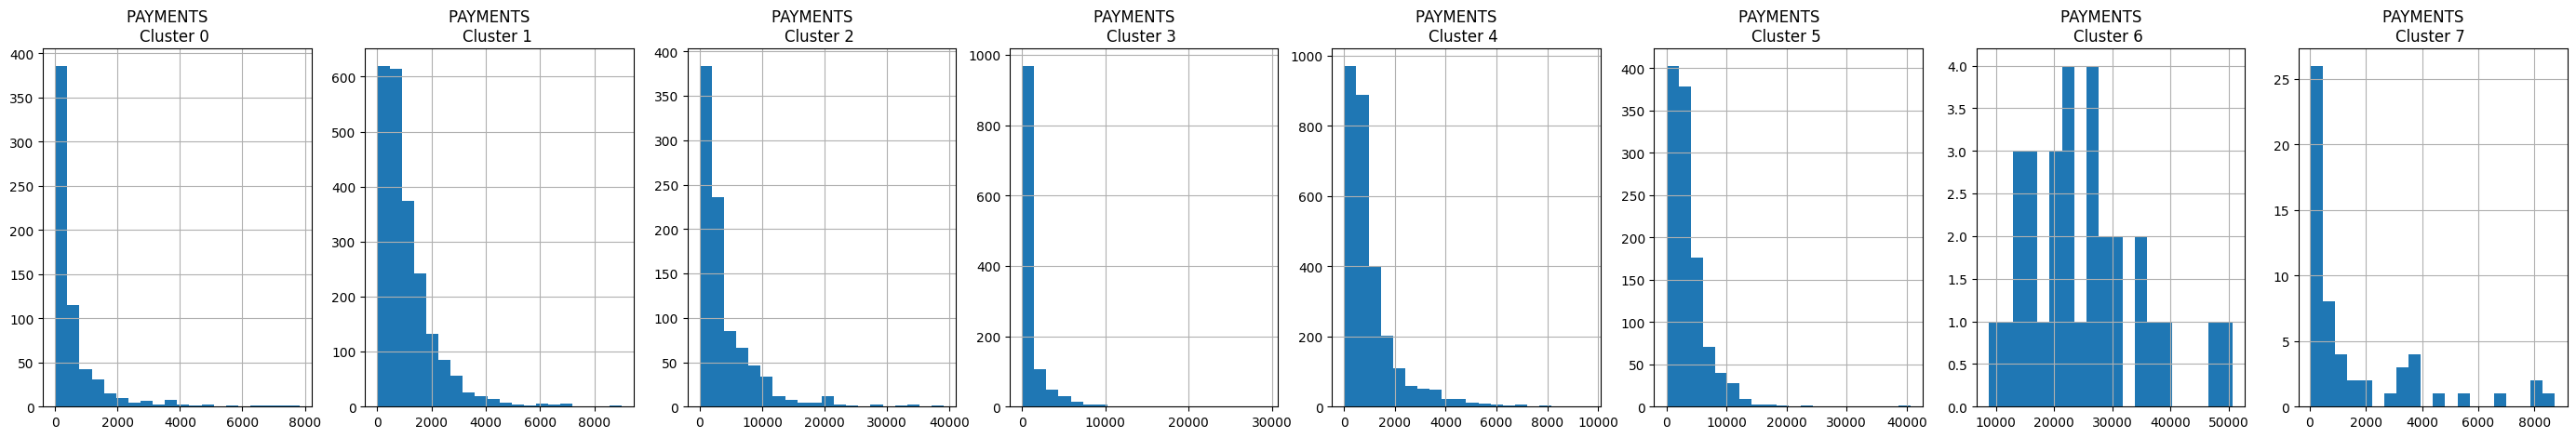

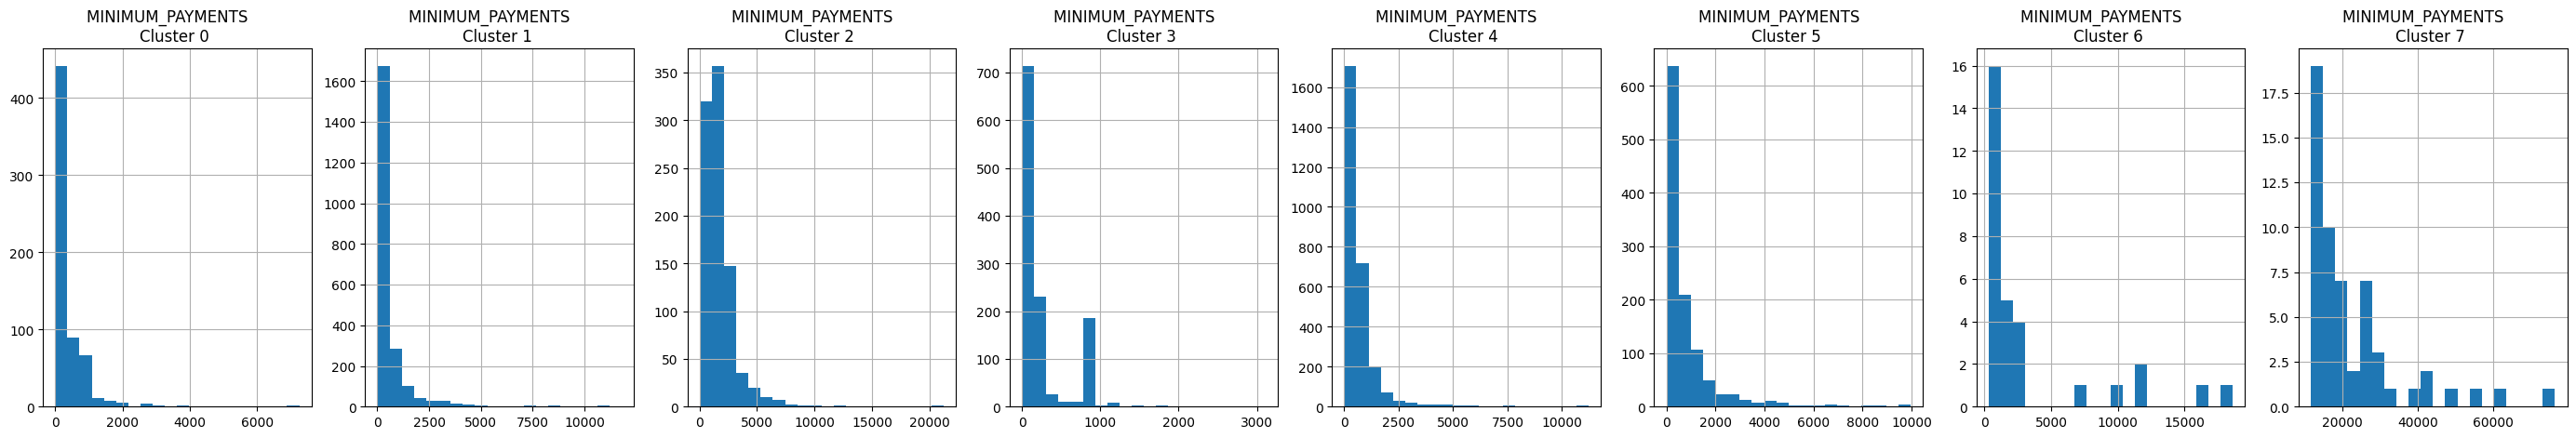

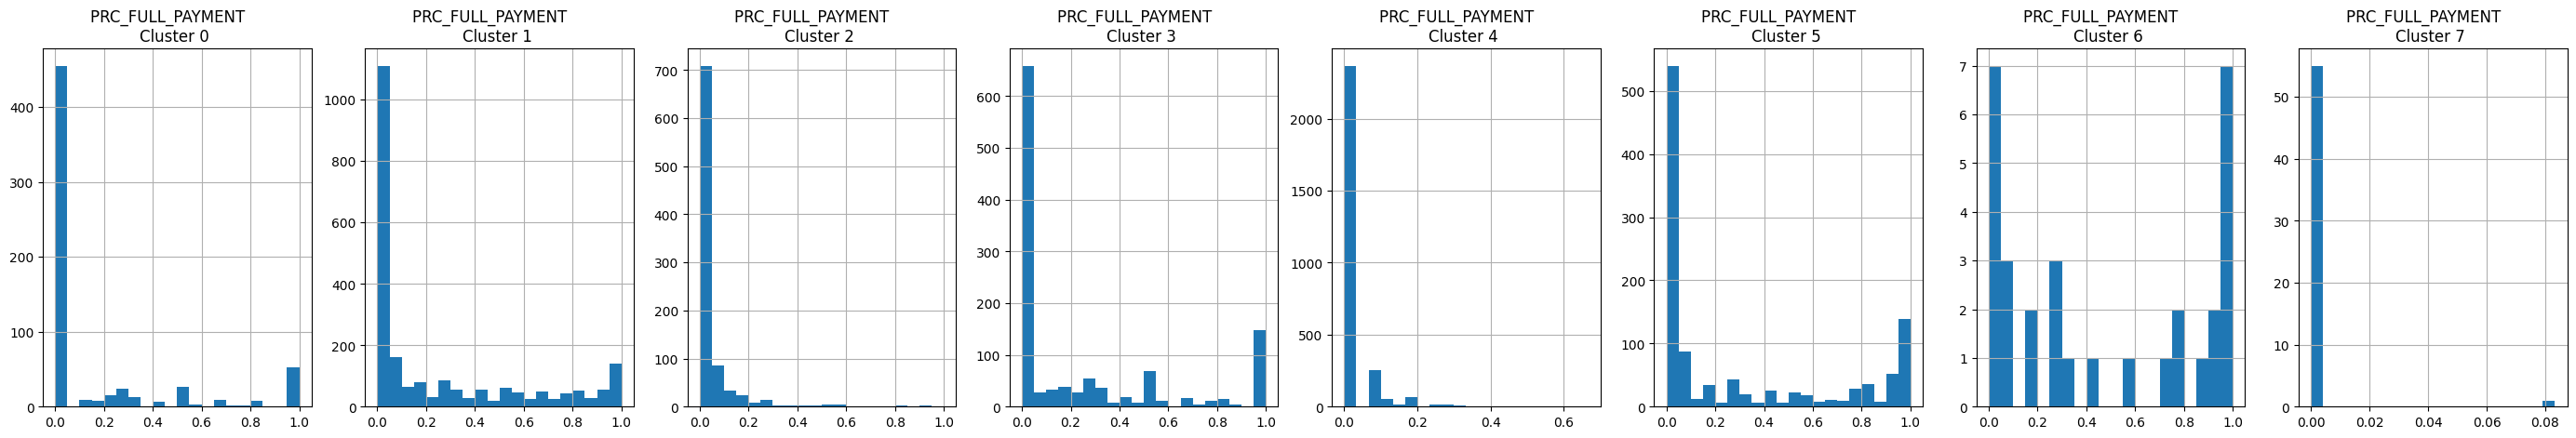

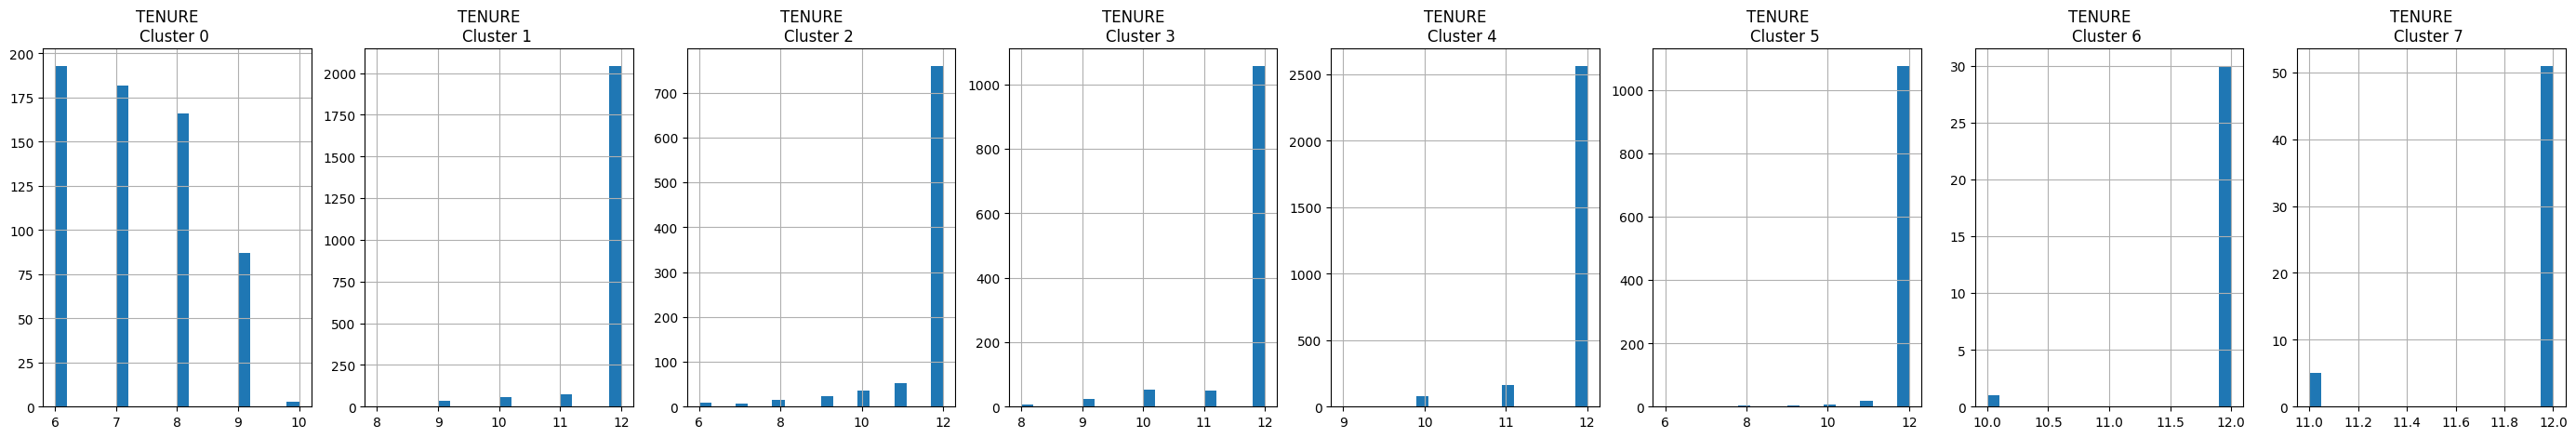

In [ ]:
# Plot the histogram of various clusters
for i in creditcard_df.columns:
  plt.figure(figsize = (35, 5))
  for j in range(8):
    plt.subplot(1,8,j+1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{}    \nCluster {} '.format(i,j))

  plt.show()

The above plot helps us name the different clusters depending on the distribution. For example:
* Balance parameter is important for clusters 0,1,3 and 5

* Purchase is important for clusters 1,2,4,5,6,7
etc.

This code helps visualize the distribution of features within each cluster generated by a k-means clustering algorithm. By examining these histograms, we can gain insights into how well the clustering separates the data based on the chosen features. We look for distinct patterns across clusters in the histograms. For good clustering, data points within a cluster should tend to be closer together compared to data points from different clusters.

# Dimensionality reduction of the clusters through Principal Component Analysis

In order to visualize the clusters identified for the customers, we will use dimensionality reduction techniques.

## Principal Component Analysis (PCA): Dimensionality Reduction for Exploratory Analysis

Principal Component Analysis (PCA) is a powerful technique in machine learning used for dimensionality reduction. It simplifies complex datasets by identifying a smaller set of features that capture the most significant variation in the data. This makes data visualization and analysis easier while minimizing information loss.

**Core Idea:**

Imagine a room full of data points scattered across a high-dimensional space. PCA aims to find new axes (principal components) that explain most of the data's spread. These components are linear combinations of the original features and are ordered by their importance (variance explained).

**The Process:**

1. **Centering:** The data is centered by subtracting the mean from each feature.
2. **Covariance Matrix:** The covariance matrix captures the linear relationships between features.
3. **Eigenvalue Decomposition:** Eigenvalues and eigenvectors are calculated from the covariance matrix. Eigenvalues represent the variance explained by each principal component, and eigenvectors define the directions of these components.
4. **Dimensionality Reduction:** We choose a subset of principal components that capture a desired percentage of the total variance (often 80-90%).

**Benefits for Exploratory Data Analysis:**

* **Visualization:** PCA allows us to visualize high-dimensional data by projecting it onto the lower-dimensional space of principal components.
* **Feature Selection:** By identifying the most informative components, PCA helps us select the most relevant features for further analysis or modeling tasks.
* **Noise Reduction:** PCA can reduce the impact of irrelevant noise in the data, leading to more robust models.

**Things to Consider:**

* **Loss of Information:** Choosing a smaller number of components involves a trade-off between dimensionality reduction and information loss.
* **Interpretation:** Interpreting the principal components can be challenging, especially when dealing with many original features.

**References:**

* [https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d](https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d)
* [https://en.wikipedia.org/wiki/Principal_component_analysis](https://en.wikipedia.org/wiki/Principal_component_analysis)

In [ ]:
# Obtain the principal components
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222123, -1.07645885],
       [-1.13829825,  2.50642327],
       [ 0.96968598, -0.38352072],
       ...,
       [-0.92620387, -1.81078014],
       [-2.33655136, -0.65794179],
       [-0.55641928, -0.40043453]])

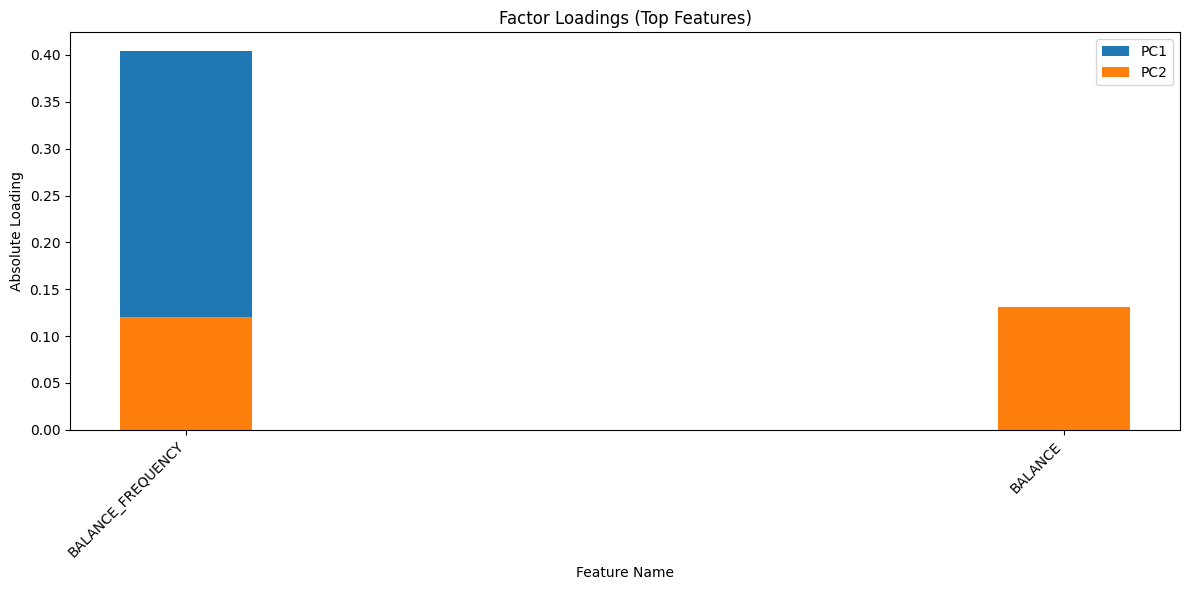

In [ ]:
# Access factor loadings
factor_loadings = pca.components_
feature_names = creditcard_df.columns

# Calculate absolute loadings for each feature
# absolute_loadings = np.abs(factor_loadings)
absolute_loadings = np.abs(factor_loadings)  # Use np.abs for absolute values
# Sort together by the first component's absolute loadings (adjust for PC of interest)
sorted_data = sorted(zip(feature_names, absolute_loadings[:, 0]), key=lambda x: x[1], reverse=True)
sorted_names, sorted_loadings = zip(*sorted_data)
# Set bar width and number of features to display (adjust as needed)
bar_width = 0.15
num_features_to_show = 10
# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as desired
plt.bar(sorted_names[:num_features_to_show], sorted_loadings[:num_features_to_show], bar_width, label='PC1')
plt.bar(sorted_names[:num_features_to_show], absolute_loadings[:, 1], bar_width, label='PC2')

# Add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Absolute Loading')  # Adjust label if using non-absolute values
plt.title('Factor Loadings (Top Features)')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for readability (optional)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076459
1,-1.138298,2.506423
2,0.969686,-0.383521
3,-0.873630,0.043143
4,-1.599434,-0.688582


In [ ]:
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.682221,-1.076459,4
1,-1.138298,2.506423,2
2,0.969686,-0.383521,5
3,-0.873630,0.043143,4
4,-1.599434,-0.688582,4


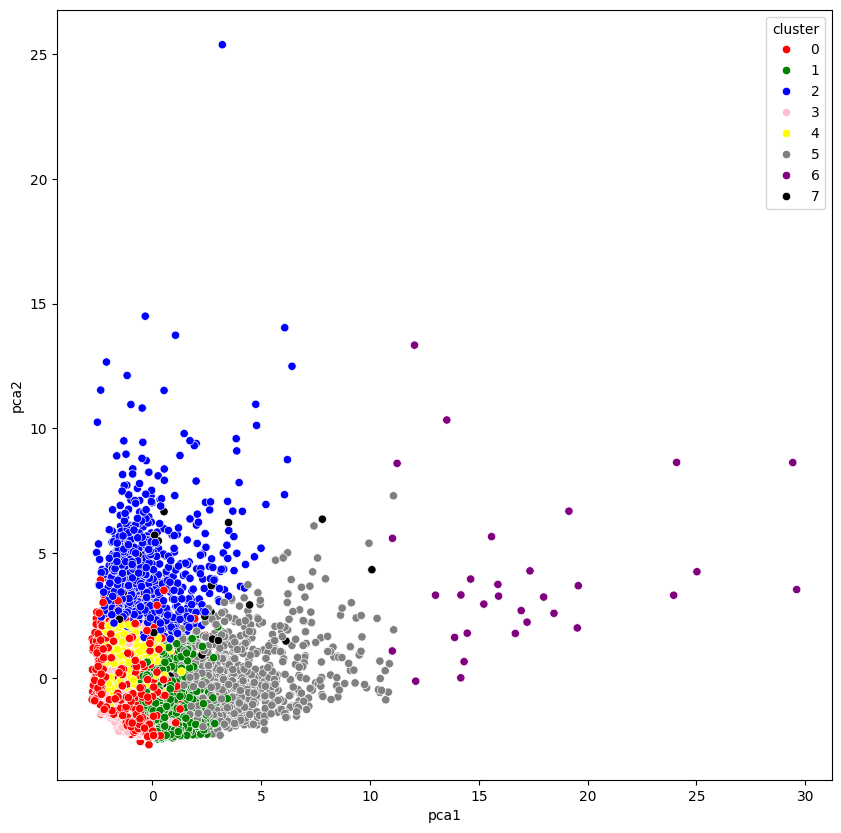

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','pink','yellow','gray','purple', 'black'])
plt.show()

From the PCA analysis, we observe that the X, Y of the graph is Balance Frequency and Balance, respectively. Thus the Purple dots are segments who use the card frequently, and have a low balance. The Blue dots, on the other hand, are infrequent users and have a high balance on the cards. The pink users are the lowest users, both in terms of balance and balance frequency. however, the large number of clusters are making the results difficult to interpret.

# Dimensionality reduction of the clusters through Auto Encoders
We now use unsupervised deep learning methods for analyzing the results
## Autoencoders: Unveiling the Hidden Structure of Your Data

Autoencoders are a fascinating type of artificial neural network architecture used for unsupervised learning. Unlike traditional neural networks trained for specific tasks (like classification), autoencoders focus on learning efficient representations of input data. Imagine an autoencoder as a skilled artist who can capture the essence of an image in a simplified sketch and then recreate the original image from that sketch.

**The Intricacy:**

An autoencoder consists of two main parts:

* **Encoder:** This part compresses the input data into a lower-dimensional representation, often called the latent space. The encoder acts like the artist, extracting the key features of the data.
* **Decoder:** This part takes the latent space representation and reconstructs the original data as accurately as possible. The decoder acts like the artist recreating the image based on the sketch.

**The Learning Process:**

Autoencoders are trained to minimize the difference between the original input data and the reconstructed output. This forces the encoder to learn a compressed representation that captures the most important information in the data.

**Benefits and Applications:**

* **Dimensionality Reduction:** Autoencoders can be used to reduce the dimensionality of data, making it easier to store, visualize, and analyze.
* **Feature Extraction:** The latent space representation learned by the encoder can be a powerful set of features for various tasks like anomaly detection, image denoising, and recommendation systems.
* **Data Compression:** Autoencoders can compress data while retaining essential information, useful for storage and transmission.

**Types of Autoencoders:**

The basic autoencoder is a versatile tool, but there are many variations designed for specific tasks. Some examples include:

* **Denoising Autoencoders:** Trained to reconstruct clean data from corrupted inputs, useful for image denoising.
* **Variational Autoencoders (VAEs):** Introduce randomness in the latent space, allowing for generative modeling of new data similar to the training data.

**Things to Keep in Mind:**

* **Choosing the right architecture:** The complexity of the encoder and decoder depends on the data and desired outcome.
* **Latent space interpretation:** Understanding what the latent space represents can be challenging, especially for complex data.

**Overall, autoencoders are a powerful tool for uncovering the hidden structure within your data. By learning efficient representations, they open doors to various applications in machine learning and data science.**

**References:**

* [https://www.jeremyjordan.me/](https://www.jeremyjordan.me/)
* [https://www.tensorflow.org/tutorials/generative/autoencoder](https://www.tensorflow.org/tutorials/generative/autoencoder)

In [ ]:
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from keras.optimizers import SGD

encoding_dim = 7

input_df = Input(shape=(17,))


# Glorot normal initializer (Xavier normal initializer) draws samples from a truncated normal distribution

x = Dense(encoding_dim, activation='relu')(input_df)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)
x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(x)

encoded = Dense(10, activation='relu', kernel_initializer = 'glorot_uniform')(x)

x = Dense(2000, activation='relu', kernel_initializer = 'glorot_uniform')(encoded)
x = Dense(500, activation='relu', kernel_initializer = 'glorot_uniform')(x)

decoded = Dense(17, kernel_initializer = 'glorot_uniform')(x)

# autoencoder
autoencoder = Model(input_df, decoded)

#encoder - used for our dimention reduction
encoder = Model(input_df, encoded)

autoencoder.compile(optimizer= 'adam', loss='mean_squared_error')

In [ ]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 17)]              0         
                                                                 
 dense (Dense)               (None, 7)                 126       
                                                                 
 dense_1 (Dense)             (None, 500)               4000      
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 2000)              1002000   
                                                                 
 dense_4 (Dense)             (None, 10)                20010     
                                                                 
 dense_5 (Dense)             (None, 2000)              22000 

In [ ]:
# fit the model
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, batch_size = 128, epochs = 25,  verbose = 1)

Epoch 1/25
70/70 [==============================] - 6s 58ms/step - loss: 0.6219
Epoch 2/25
70/70 [==============================] - 5s 66ms/step - loss: 0.3311
Epoch 3/25
70/70 [==============================] - 6s 79ms/step - loss: 0.2522
Epoch 4/25
70/70 [==============================] - 4s 58ms/step - loss: 0.2072
Epoch 5/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1902
Epoch 6/25
70/70 [==============================] - 6s 87ms/step - loss: 0.1836
Epoch 7/25
70/70 [==============================] - 4s 59ms/step - loss: 0.1634
Epoch 8/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1538
Epoch 9/25
70/70 [==============================] - 5s 73ms/step - loss: 0.1420
Epoch 10/25
70/70 [==============================] - 5s 71ms/step - loss: 0.1267
Epoch 11/25
70/70 [==============================] - 4s 58ms/step - loss: 0.1222
Epoch 12/25
70/70 [==============================] - 4s 61ms/step - loss: 0.1176
Epoch 13/25
70/70 [==================

In [ ]:
# Save the weights
autoencoder.save_weights('autoencoder.h5')

In [ ]:
pred = encoder.predict(creditcard_df_scaled)
pred.shape

280/280 [==============================] - 1s 5ms/step


(8950, 10)

The 'pred' variable works as a noise-removed variable from the original data. Thus, a clustering on this data will be better indicative of the true nature of the customer segments

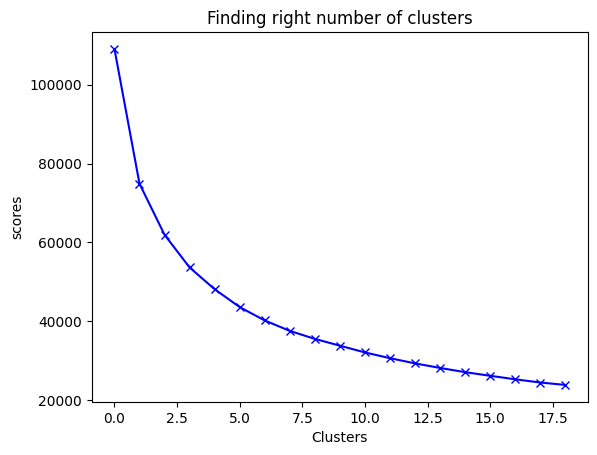

In [ ]:
scores_2 = []

range_values = range(1, 20)

for i in range_values:
  kmeans = KMeans(n_clusters= i,n_init=10)
  kmeans.fit(pred)
  scores_2.append(kmeans.inertia_)

plt.plot(scores_2, 'bx-')
plt.title('Finding right number of clusters')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

Text(0.5, 1.0, 'Comparing K-means and Autoencoder')

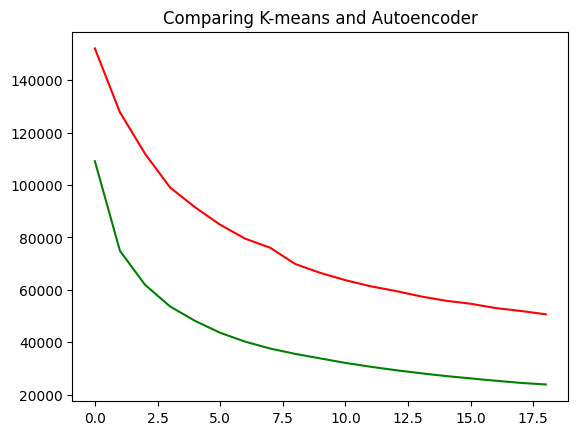

In [ ]:
plt.plot(scores_1, color = 'r')
plt.plot(scores_2, color = 'g')
plt.title('Comparing K-means and Autoencoder')
plt.xlabel('Clusters')
plt.ylabel('scores')
plt.show()

The comparison shows that the actual number of clusters from the de-noised data is 4. We can thus use this information to do a re-clustering of the data.

In [ ]:
# now do K-Means with the correct number of clusters
kmeans = KMeans(4,n_init = 5)
kmeans.fit(pred)
labels = kmeans.labels_
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)

In [ ]:
df_cluster_dr = pd.concat([creditcard_df, pd.DataFrame({'cluster':labels})], axis = 1)
df_cluster_dr.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


In [ ]:
pca = PCA(n_components=2)
prin_comp = pca.fit_transform(pred)
pca_df = pd.DataFrame(data = prin_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-2.308436,-0.003643
1,2.549249,-2.482976
2,-0.772910,0.805569
3,-0.522761,-0.774959
4,-2.393450,-0.039847


In [ ]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-2.308436,-0.003643,1
1,2.549249,-2.482976,2
2,-0.772910,0.805569,1
3,-0.522761,-0.774959,1
4,-2.393450,-0.039847,1


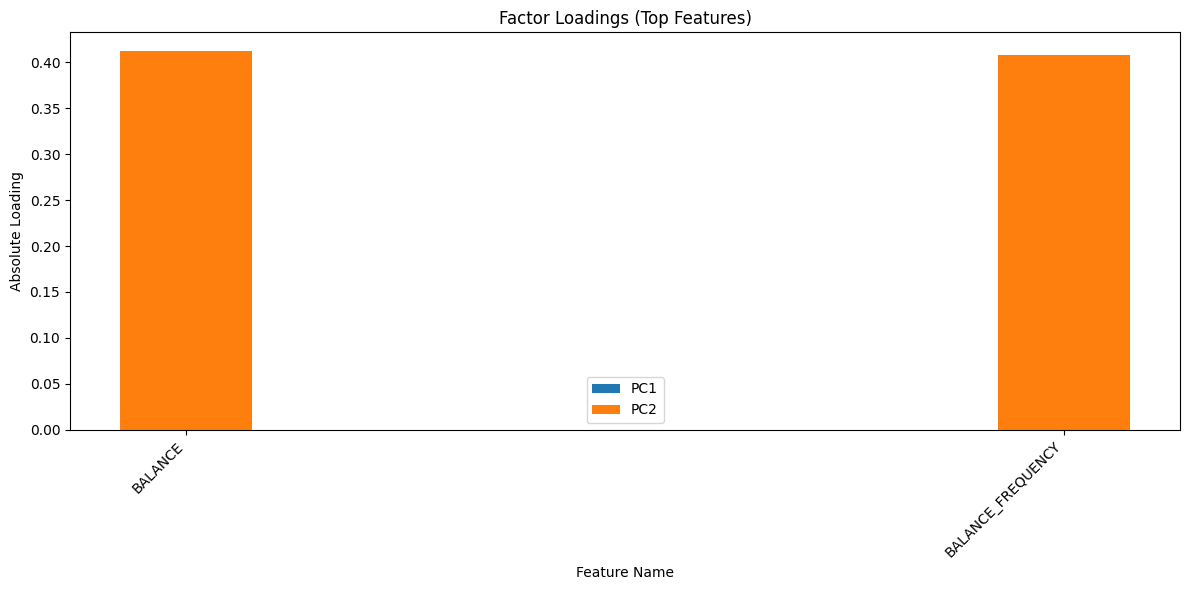

In [ ]:
# Access factor loadings
factor_loadings = pca.components_
feature_names = creditcard_df.columns

# Calculate absolute loadings for each feature
absolute_loadings = np.abs(factor_loadings)  # Use np.abs for absolute values
# Sort together by the first component's absolute loadings (adjust for PC of interest)
sorted_data = sorted(zip(feature_names, absolute_loadings[:, 0]), key=lambda x: x[1], reverse=True)
sorted_names, sorted_loadings = zip(*sorted_data)
# Set bar width and number of features to display (adjust as needed)
bar_width = 0.15
num_features_to_show = 10
# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as desired
plt.bar(sorted_names[:num_features_to_show], sorted_loadings[:num_features_to_show], bar_width, label='PC1')
plt.bar(sorted_names[:num_features_to_show], absolute_loadings[:, 1], bar_width, label='PC2')

# Add labels and title
plt.xlabel('Feature Name')
plt.ylabel('Absolute Loading')  # Adjust label if using non-absolute values
plt.title('Factor Loadings (Top Features)')
plt.xticks(rotation=45, ha='right')  # Rotate feature names for readability (optional)
plt.legend()
plt.tight_layout()
plt.show()

On the de-noised data, the factor loadings are clearly segregated into Balance and Balance Enquiry.

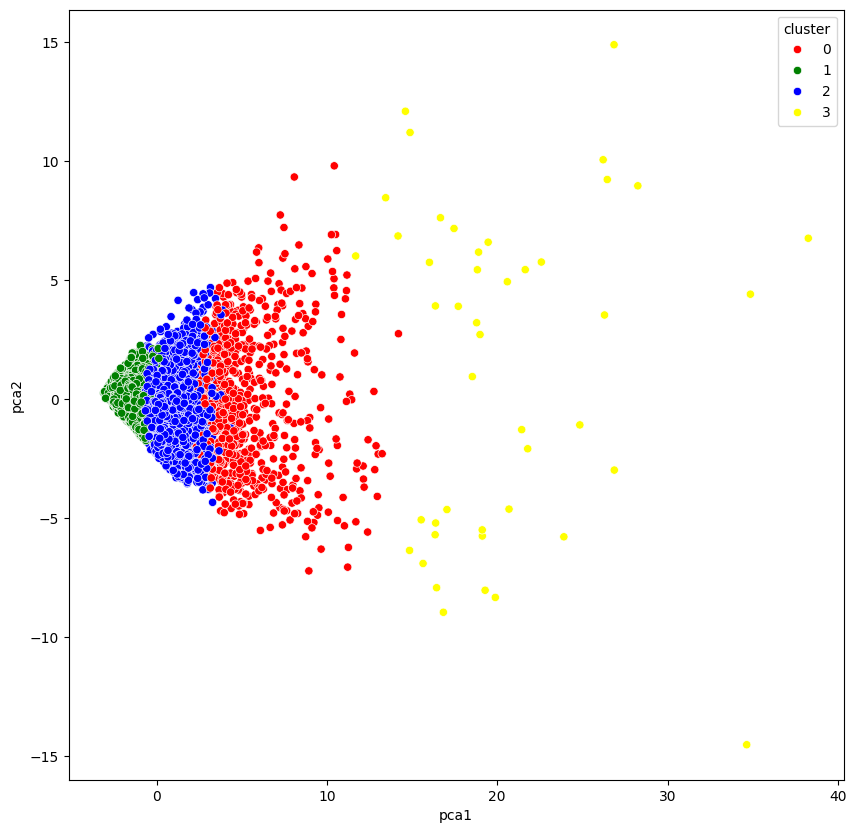

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','yellow'])
plt.show()

Here, we get a clean division of clusters with good distinction and explanability of the segments.

# Conclusion
In conclusion, this project helped to successfully segment our customer base through a multi-step approach. After data cleaning and exploration, k-means clustering identified eight initial segments. Dimensionality reduction with PCA facilitated cluster interpretation, and further refinement using autoencoders led to a more focused view with four distinct customer segments. Applying PCA again on the final clusters with the main data confirmed the presence of these four well-defined customer segments. This comprehensive analysis provides valuable insights into our customer base, allowing us to develop targeted marketing strategies and improve customer experience.

**Future Scope of Work:**

* **Enrichment with Customer Data:** We can incorporate additional customer data sources, such as social media interactions or loyalty program data, to potentially uncover even deeper customer segments.
* **Predictive Modeling:** Leverage the identified segments for supervised machine learning tasks. Build models to predict customer behavior (e.g., churn risk, purchase likelihood) for more personalized marketing and customer service.
* **Segment Monitoring and Evolution:** Continuously monitor customer behavior and segment characteristics over time. Implement mechanisms to detect shifts in segment behavior and adapt marketing strategies accordingly.
* **Explainable AI:** Explore techniques like LIME (Local Interpretable Model-Agnostic Explanations) to understand the factors driving customer segmentation and provide clear explanations for marketing teams.

By building upon this foundation, we can gain a continuously evolving understanding of our customer base, fostering stronger customer relationships and driving business growth.
